In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import importlib
import data_analyzer
import pandas as pd
importlib.reload(data_analyzer);

In [4]:
numerical_columns = ['age', 'annual_income', 'purchase_amount']
categorical_columns = ['gender']

dataframe = pd.read_csv('../data/customer_purchases.csv') 
analyzer = data_analyzer.DataframeAnalyzer(dataframe=dataframe, numerical_columns=numerical_columns, categorical_columns=categorical_columns)
len(analyzer.dataframe)

9805

In [5]:
analyzer.ConsistincyChecker.check_constant_column_consistency(constant_columns=["gender", "annual_income"]);
analyzer.ConsistincyChecker.check_age_consistency();

No inconsistencies found in the dataset for the specified columns.
No inconsistencies found in the 'age' column.


In [6]:
analyzer.FeatureEngineer.squash_rows_by_customer_month_year();
analyzer.FeatureEngineer.compute_next_month_purchase_amount();

In [7]:
analyzer.Statics.summary

customer_id  purchase_year  purchase_month          age  annual_income  \
count  7884.000000    7884.000000     7884.000000  7865.000000   7.879000e+03   
mean   1006.812278    2023.389143        6.539447    37.406866   8.394694e+04   
std     577.362823       0.487587        3.454434    16.389865   3.409906e+04   
min       1.000000    2023.000000        1.000000     0.000000   0.000000e+00   
25%     501.000000    2023.000000        4.000000    25.000000   6.007600e+04   
50%    1014.000000    2023.000000        7.000000    33.000000   8.422800e+04   
75%    1510.000000    2024.000000       10.000000    43.000000   1.099760e+05   
max    2000.000000    2024.000000       12.000000    80.000000   1.015980e+06   

       purchase_amount  next_month_purchase_amount  
count      7884.000000                 5970.000000  
mean        741.462972                  744.294161  
std         503.224746                  504.477374  
min           0.130000                    0.130000  
25%         362.422500                  365.515000  
50%         694.085000                  695.180000  
75%        1004.577500                 1004.657500  
max        4387.480000                 4387.480000

In [8]:
analyzer.Statics.get_all_statistics;

Number of unique customer: 1914
Number of rows affected by NaN values: 35
Number of rows affected by Inf values: 0
Number of rows affected by Invalid values: 0

Count of NaN values in each column:
customer_id                      0
purchase_year                    0
purchase_month                   0
age                             19
gender                          15
annual_income                    5
purchase_date                    0
purchase_amount                  0
next_month_purchase_amount    1914
dtype: int64

Count of Inf values in each numerical column:
age                0
annual_income      0
purchase_amount    0
dtype: int64

Count of Negative values in each numerical column:
age                0
annual_income      0
purchase_amount    0
dtype: int64
Duplicate row count: 0


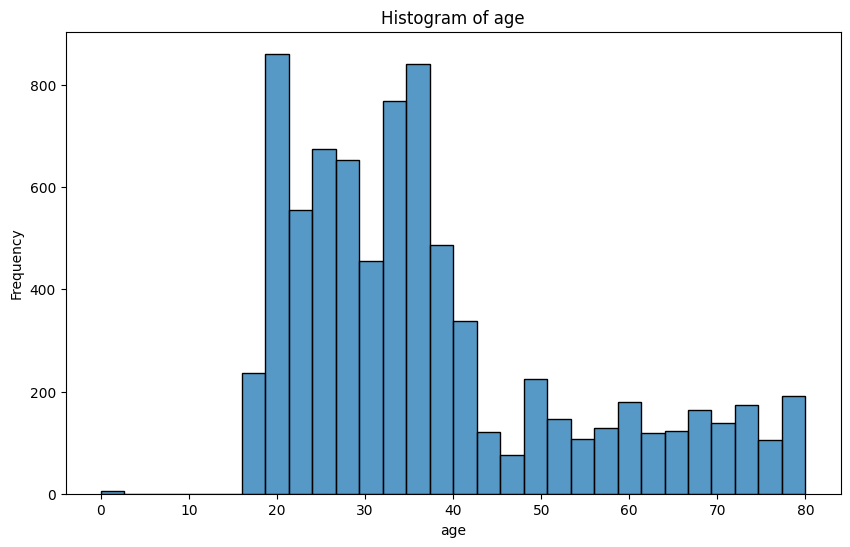

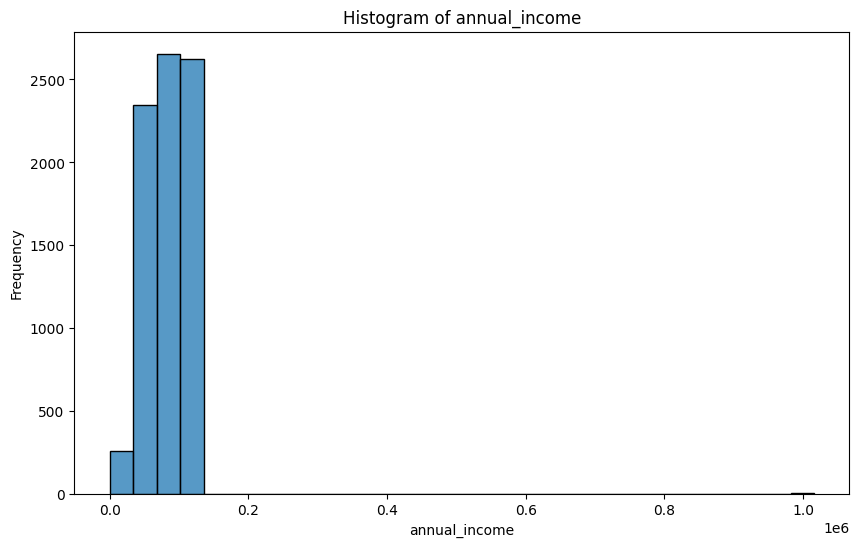

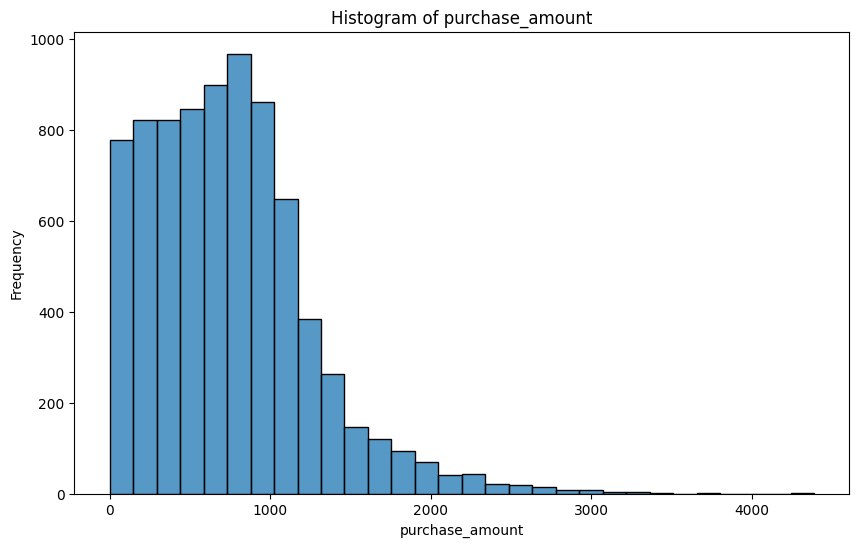

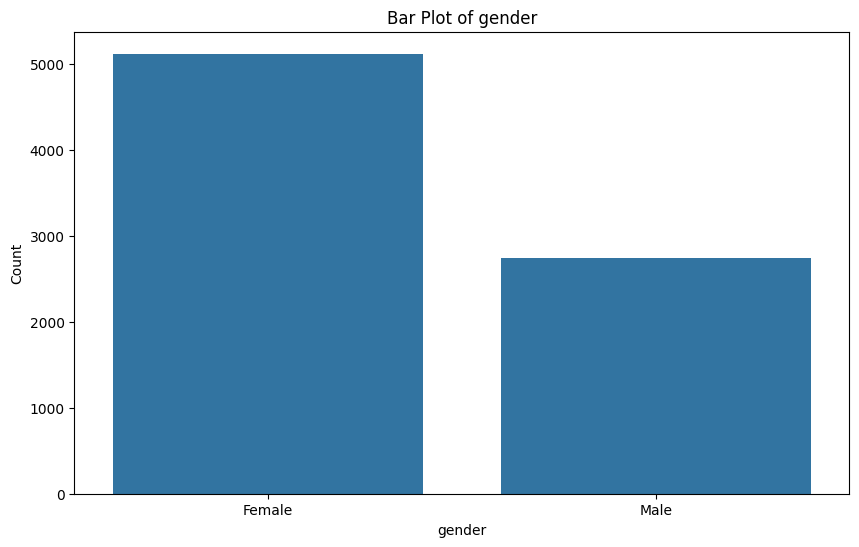

In [9]:
analyzer.Plotter.histograms()

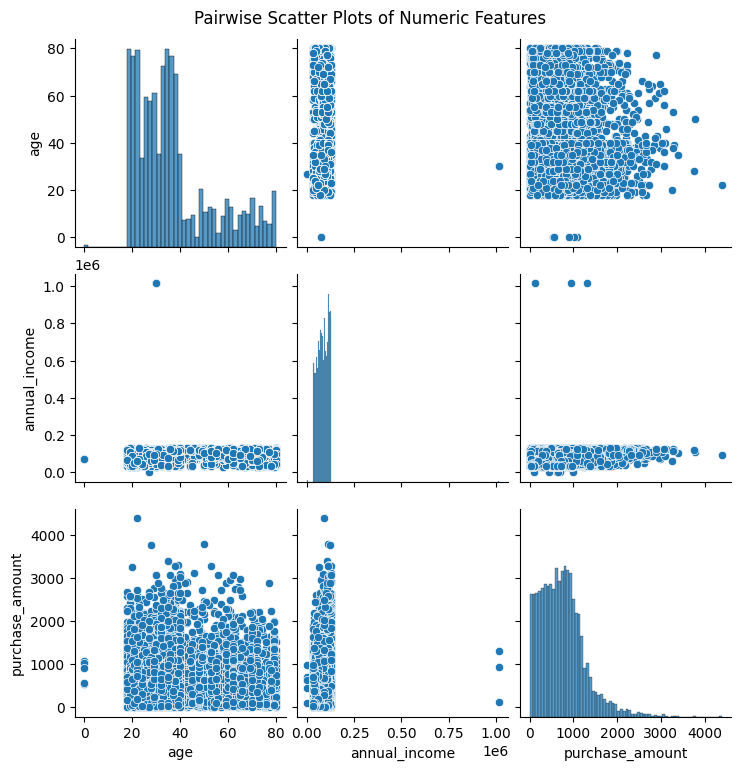

In [10]:
analyzer.Plotter.pairwise_scatter()

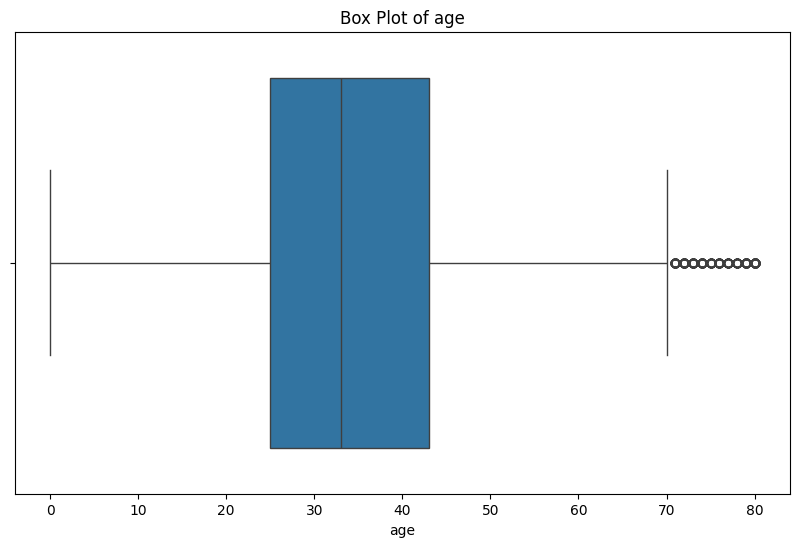

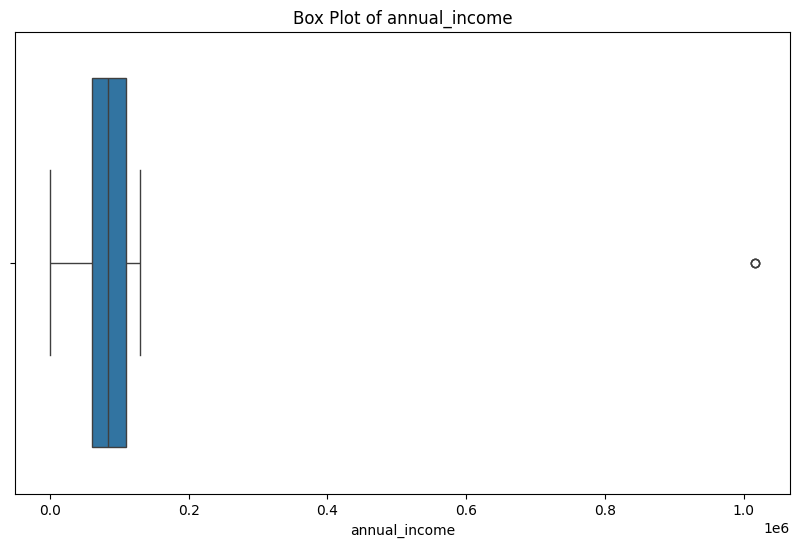

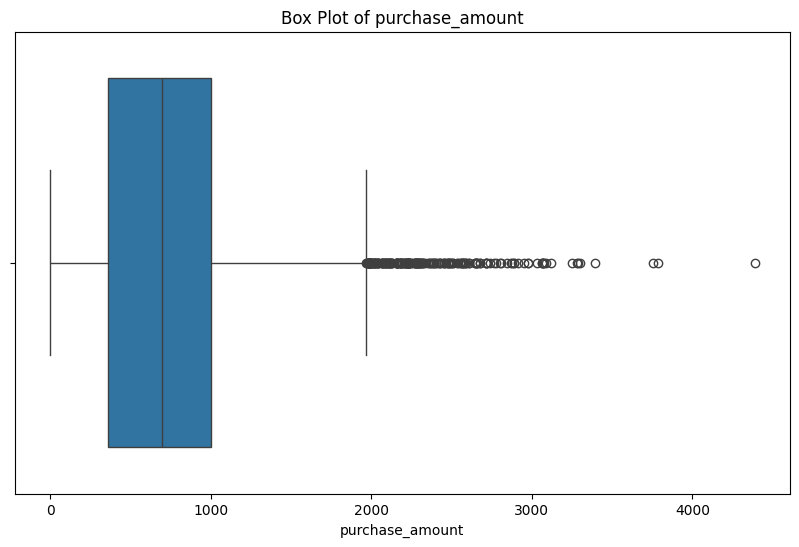

In [11]:
analyzer.Plotter.box_plots()

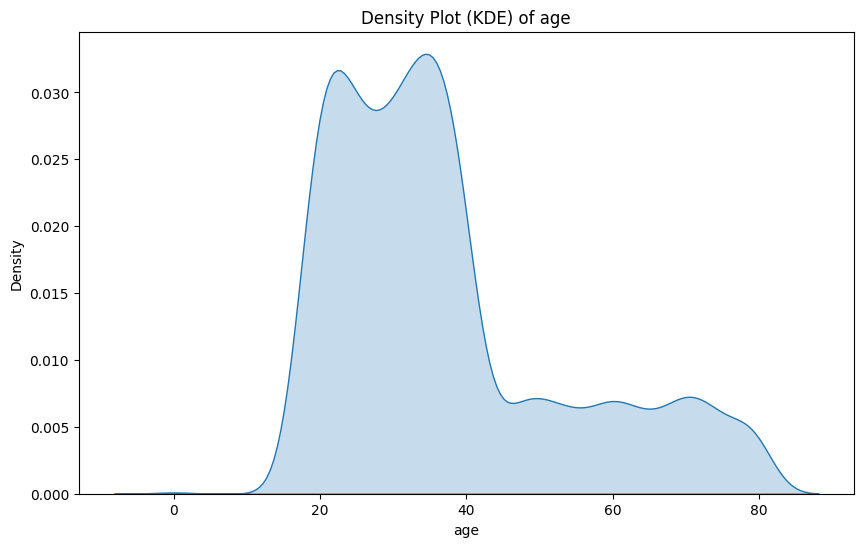

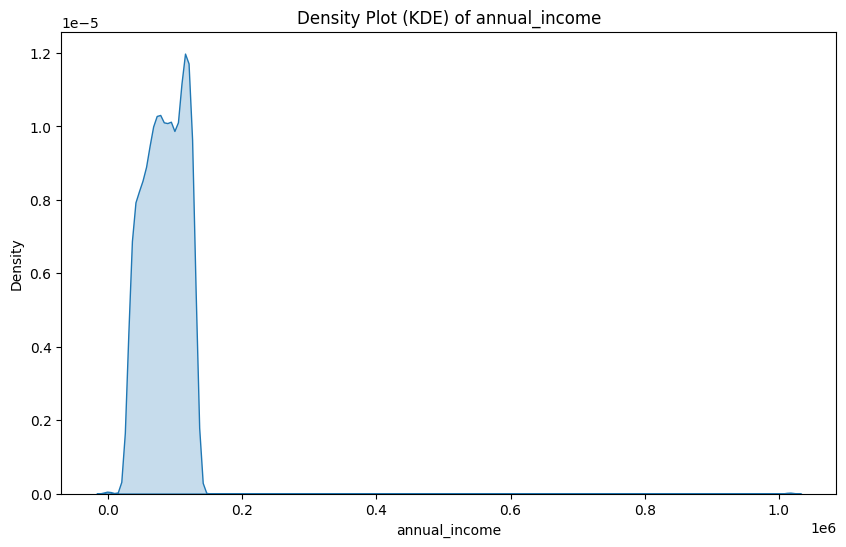

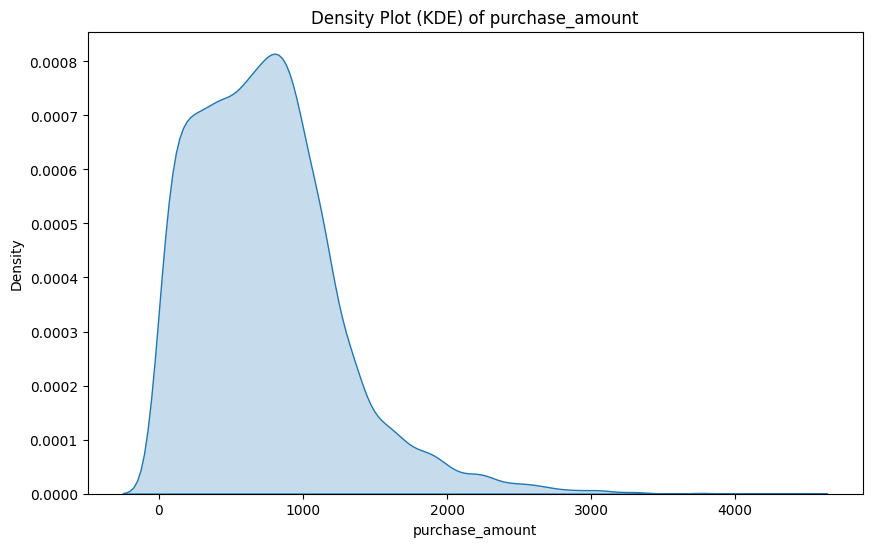

In [12]:
analyzer.Plotter.kde_plots()

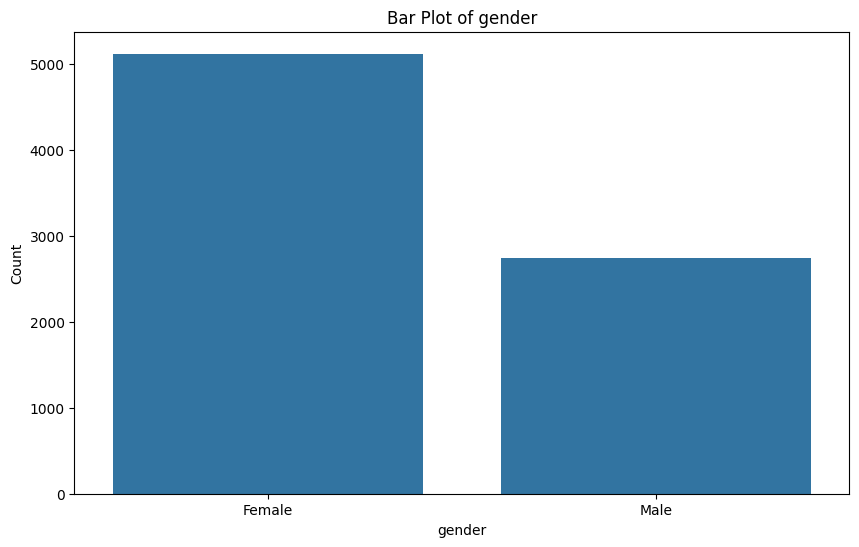

In [13]:
analyzer.Plotter.bar_plots()

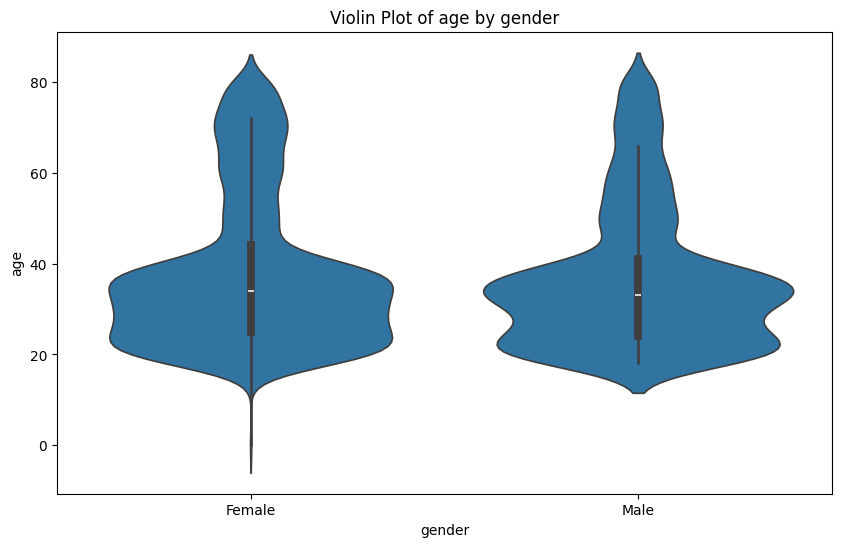

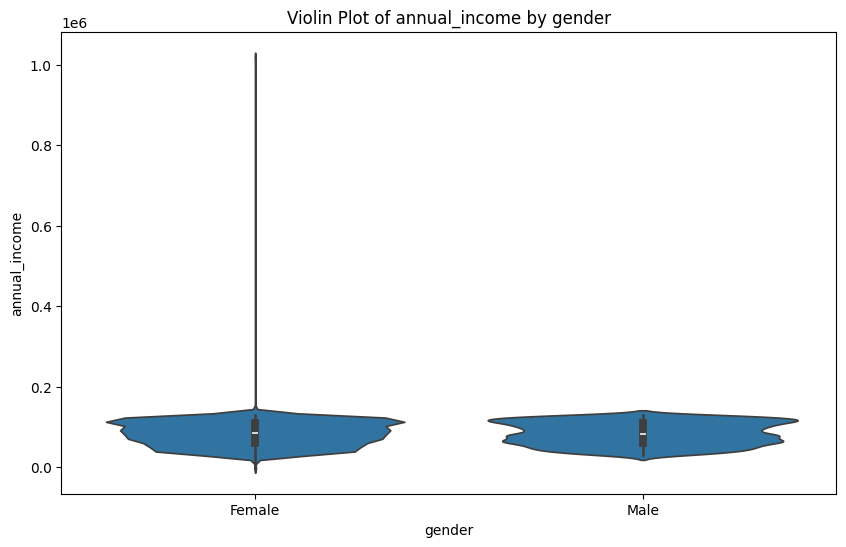

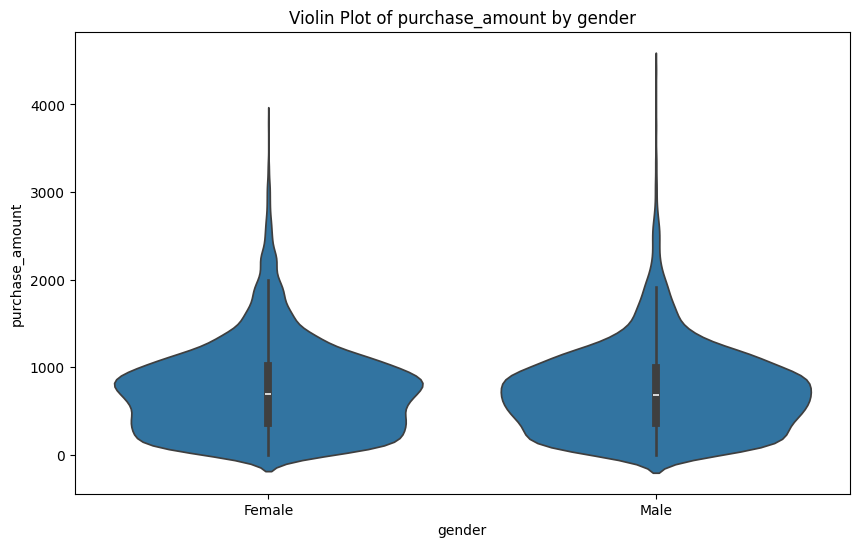

In [14]:
analyzer.Plotter.violin_plots()

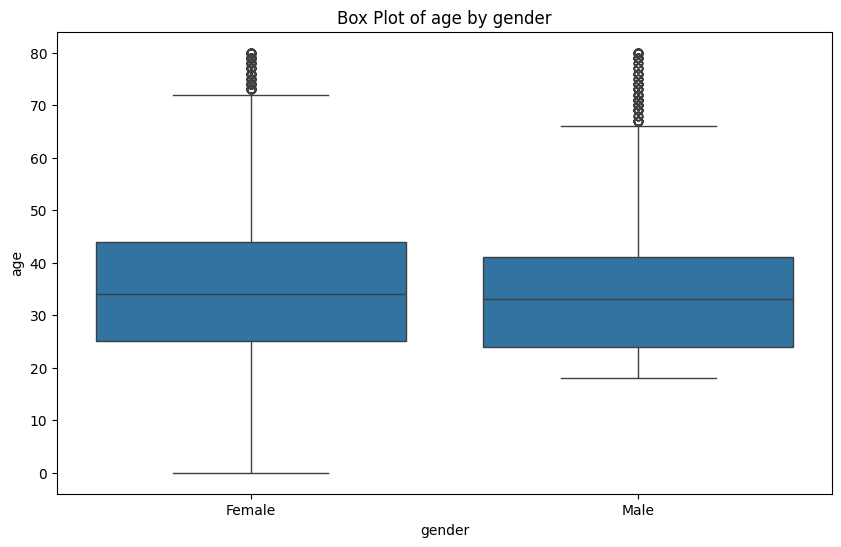

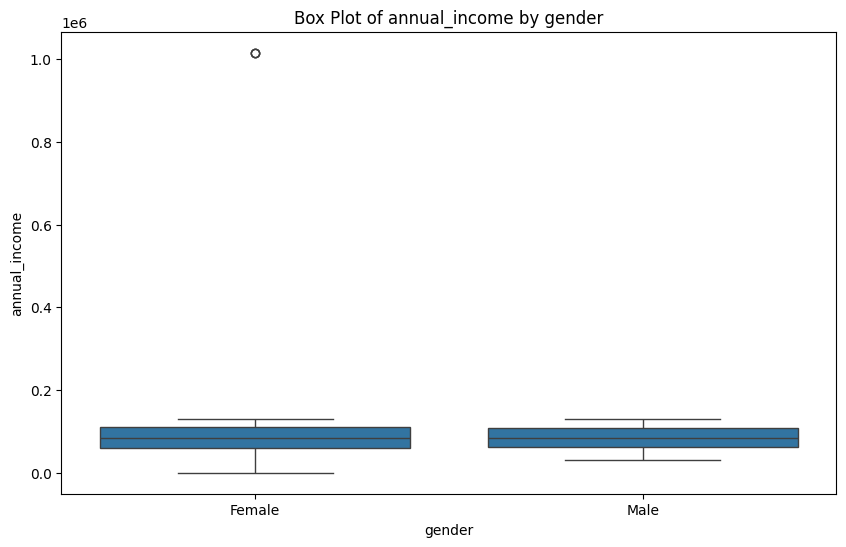

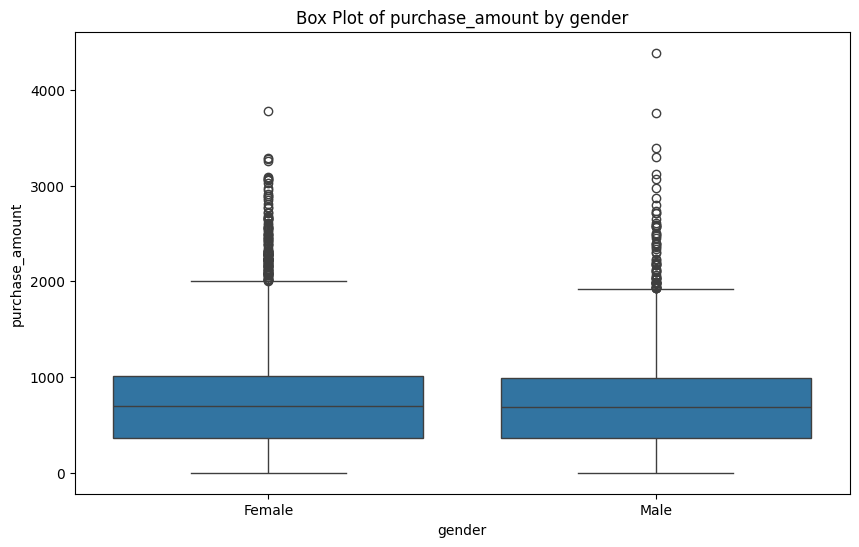

In [15]:
analyzer.Plotter.numerical_categorical_relationships()

In [16]:
analyzer.Correlation.categorical_correlation_matrix(plot=True);

At least 2 features need to calculate corelation matrix.


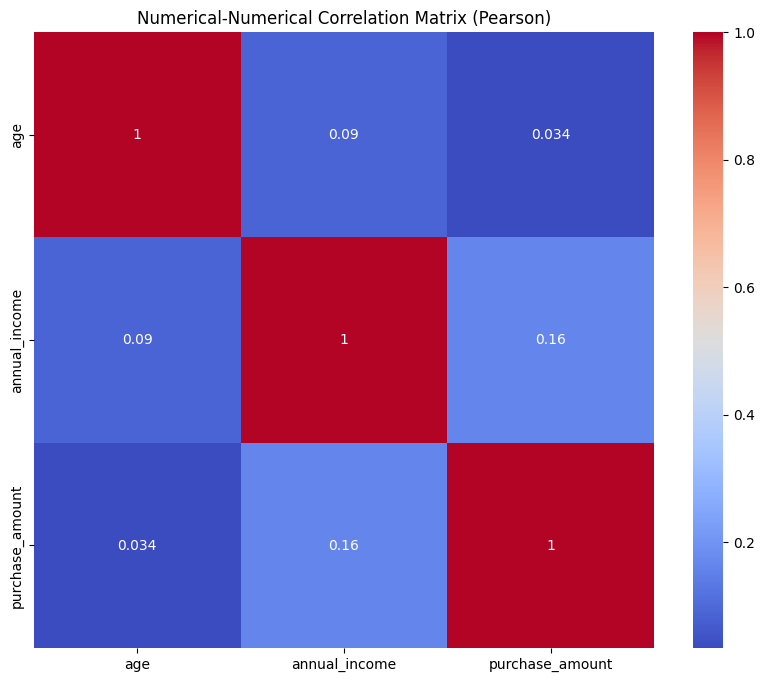

In [17]:
analyzer.Correlation.numerical_correlation_matrix(plot=True);

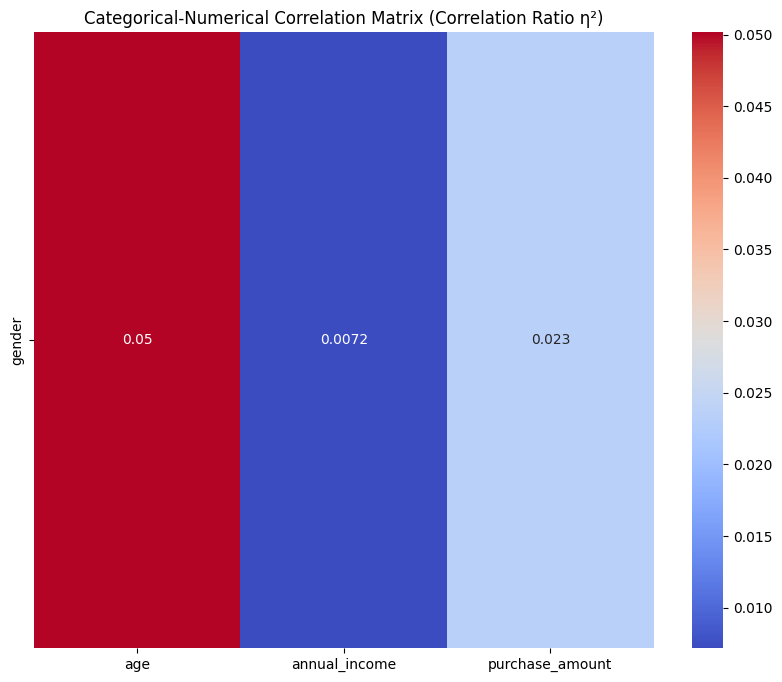

In [18]:
analyzer.Correlation.categorical_numerical_correlation_matrix(plot=True);

In [19]:
analyzer.FeatureEngineer.one_hot_encode_categorical_data();

## Handling Missing Values

## Option - 1 Dropping Invalid Values

In [20]:
analyzer.FeatureEngineer.drop_invalid_rows()

Initial row count: 7884
Row count after dropping NaNs: 7855
Row count after dropping Infs: 7855
Row count after dropping negative values: 7855


customer_id  purchase_year  purchase_month   age  gender  annual_income  \
0               1           2023               7  40.0  Female       119228.0   
1               1           2023              10  40.0  Female       119228.0   
2               1           2023              11  40.0  Female       119228.0   
3               1           2023              12  40.0  Female       119228.0   
4               1           2024               2  40.0  Female       119228.0   
...           ...            ...             ...   ...     ...            ...   
7879         2000           2023               9  35.0  Female        32476.0   
7880         2000           2023              11  35.0  Female        32476.0   
7881         2000           2024               1  35.0  Female        32476.0   
7882         2000           2024               2  35.0  Female        32476.0   
7883         2000           2024               4  35.0  Female        32476.0   

                 purchase_date  purchase_amount  next_month_purchase_amount  \
0    2023-07-20 19:16:58+03:00           725.54                     2023.40   
1    2023-10-23 19:16:58+03:00          2023.40                     1415.56   
2    2023-11-22 19:16:58+03:00          1415.56                     1703.75   
3    2023-12-23 19:16:58+03:00          1703.75                      216.73   
4    2024-02-10 19:16:58+03:00           216.73                     1102.69   
...                        ...              ...                         ...   
7879 2023-09-14 19:16:58+03:00           915.30                      972.72   
7880 2023-11-24 19:16:58+03:00           972.72                       33.09   
7881 2024-01-21 19:16:58+03:00            33.09                      618.88   
7882 2024-02-14 19:16:58+03:00           618.88                      707.98   
7883 2024-04-02 19:16:58+03:00           707.98                         NaN   

      gender_Female  gender_Male  
0              True        False  
1              True        False  
2              True        False  
3              True        False  
4              True        False  
...             ...          ...  
7879           True        False  
7880           True        False  
7881           True        False  
7882           True        False  
7883           True        False  

[7855 rows x 11 columns]

In [21]:
analyzer.Statics.get_all_statistics;

Number of unique customer: 1908
Number of rows affected by NaN values: 35
Number of rows affected by Inf values: 0
Number of rows affected by Invalid values: 0

Count of NaN values in each column:
customer_id                      0
purchase_year                    0
purchase_month                   0
age                              0
gender                           0
annual_income                    0
purchase_date                    0
purchase_amount                  0
next_month_purchase_amount    1908
gender_Female                    0
gender_Male                      0
dtype: int64

Count of Inf values in each numerical column:
age                0
annual_income      0
purchase_amount    0
dtype: int64

Count of Negative values in each numerical column:
age                0
annual_income      0
purchase_amount    0
dtype: int64
Duplicate row count: 0


In [22]:
analyzer.FeatureEngineer.one_hot_encode_categorical_data()

customer_id  purchase_year  purchase_month   age  gender  annual_income  \
0               1           2023               7  40.0  Female       119228.0   
1               1           2023              10  40.0  Female       119228.0   
2               1           2023              11  40.0  Female       119228.0   
3               1           2023              12  40.0  Female       119228.0   
4               1           2024               2  40.0  Female       119228.0   
...           ...            ...             ...   ...     ...            ...   
7879         2000           2023               9  35.0  Female        32476.0   
7880         2000           2023              11  35.0  Female        32476.0   
7881         2000           2024               1  35.0  Female        32476.0   
7882         2000           2024               2  35.0  Female        32476.0   
7883         2000           2024               4  35.0  Female        32476.0   

                 purchase_date  purchase_amount  next_month_purchase_amount  \
0    2023-07-20 19:16:58+03:00           725.54                     2023.40   
1    2023-10-23 19:16:58+03:00          2023.40                     1415.56   
2    2023-11-22 19:16:58+03:00          1415.56                     1703.75   
3    2023-12-23 19:16:58+03:00          1703.75                      216.73   
4    2024-02-10 19:16:58+03:00           216.73                     1102.69   
...                        ...              ...                         ...   
7879 2023-09-14 19:16:58+03:00           915.30                      972.72   
7880 2023-11-24 19:16:58+03:00           972.72                       33.09   
7881 2024-01-21 19:16:58+03:00            33.09                      618.88   
7882 2024-02-14 19:16:58+03:00           618.88                      707.98   
7883 2024-04-02 19:16:58+03:00           707.98                         NaN   

      gender_Female  gender_Male  
0              True        False  
1              True        False  
2              True        False  
3              True        False  
4              True        False  
...             ...          ...  
7879           True        False  
7880           True        False  
7881           True        False  
7882           True        False  
7883           True        False  

[7855 rows x 11 columns]

In [23]:
# analyzer.separate_and_save_datasets(train_filename='data/raw_dropped_train_dataset.csv', test_filename='data/raw_dropped_test_dataset.csv')

### RE-PLOT CLEARED DATASET

In [24]:
analyzer.Statics.get_all_statistics;

Number of unique customer: 1908
Number of rows affected by NaN values: 35
Number of rows affected by Inf values: 0
Number of rows affected by Invalid values: 0

Count of NaN values in each column:
customer_id                      0
purchase_year                    0
purchase_month                   0
age                              0
gender                           0
annual_income                    0
purchase_date                    0
purchase_amount                  0
next_month_purchase_amount    1908
gender_Female                    0
gender_Male                      0
dtype: int64

Count of Inf values in each numerical column:
age                0
annual_income      0
purchase_amount    0
dtype: int64

Count of Negative values in each numerical column:
age                0
annual_income      0
purchase_amount    0
dtype: int64
Duplicate row count: 0


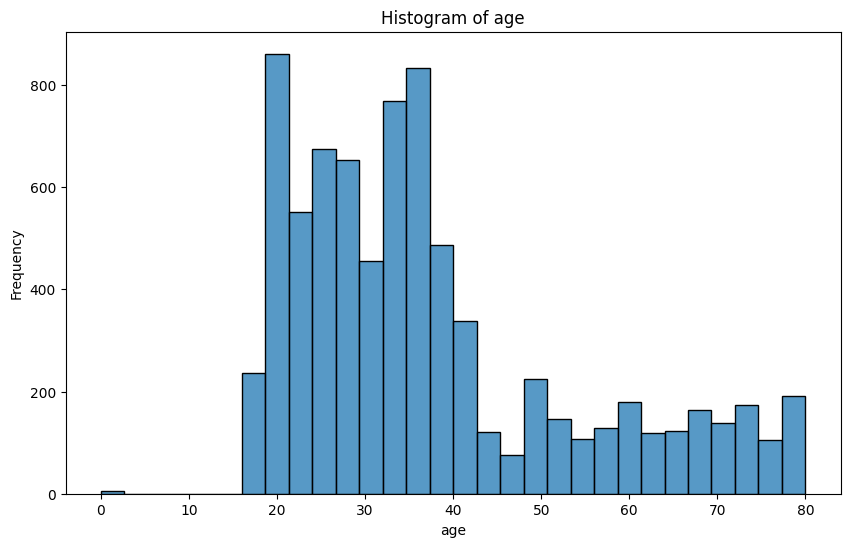

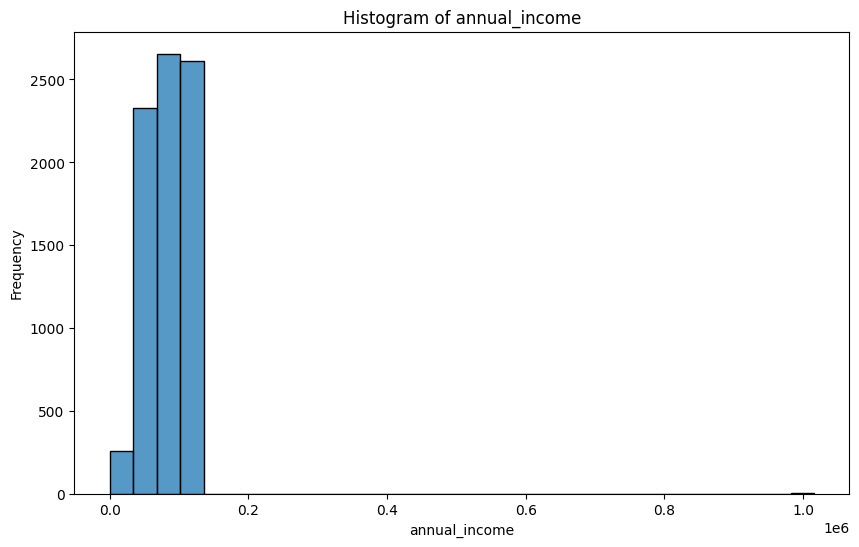

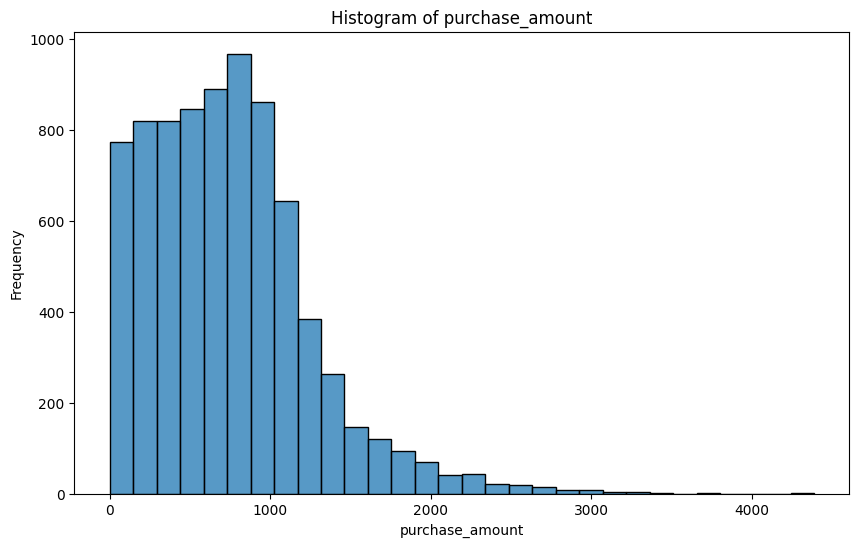

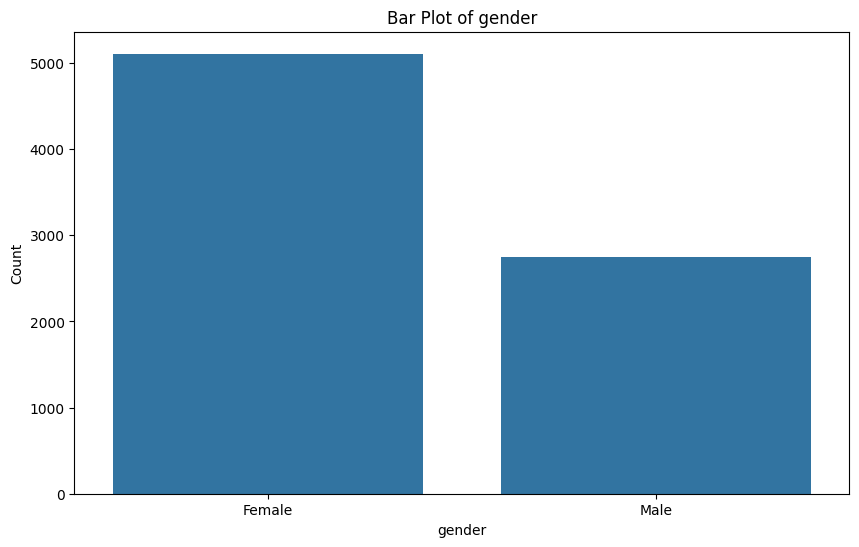

In [25]:
analyzer.Plotter.histograms()

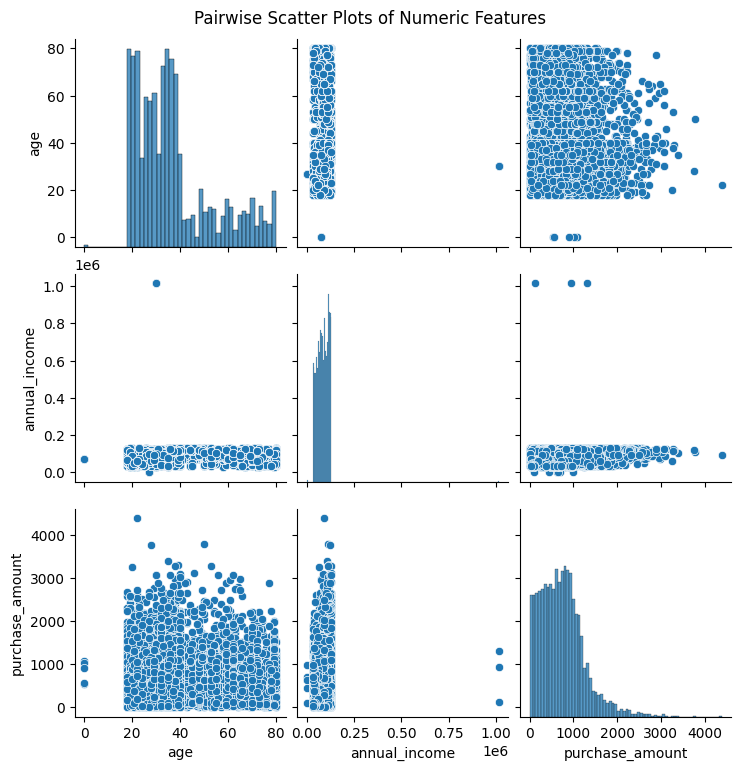

In [26]:
analyzer.Plotter.pairwise_scatter()

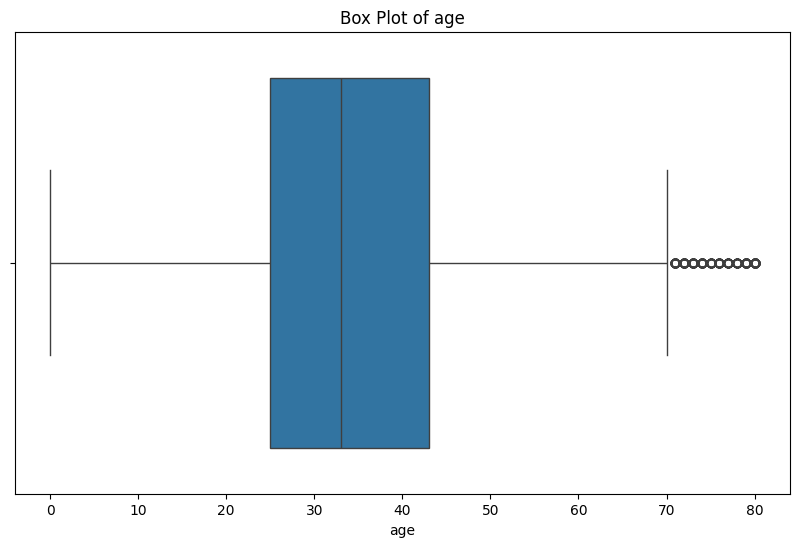

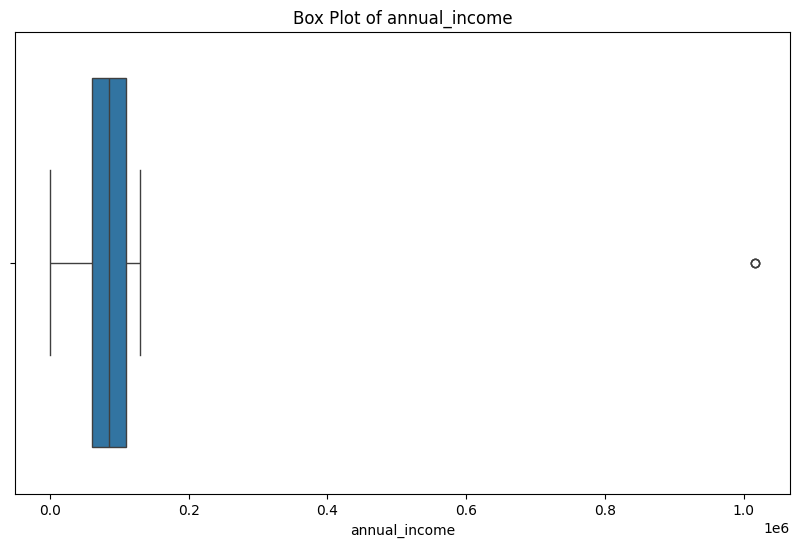

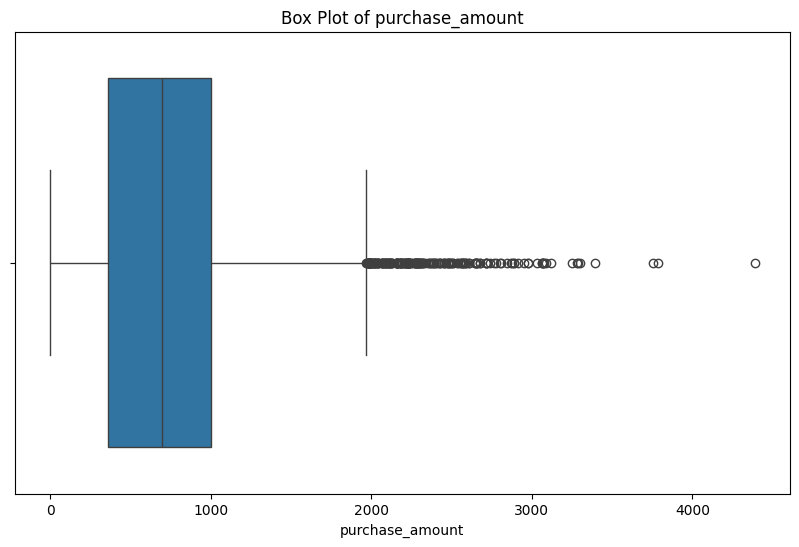

In [27]:
analyzer.Plotter.box_plots()

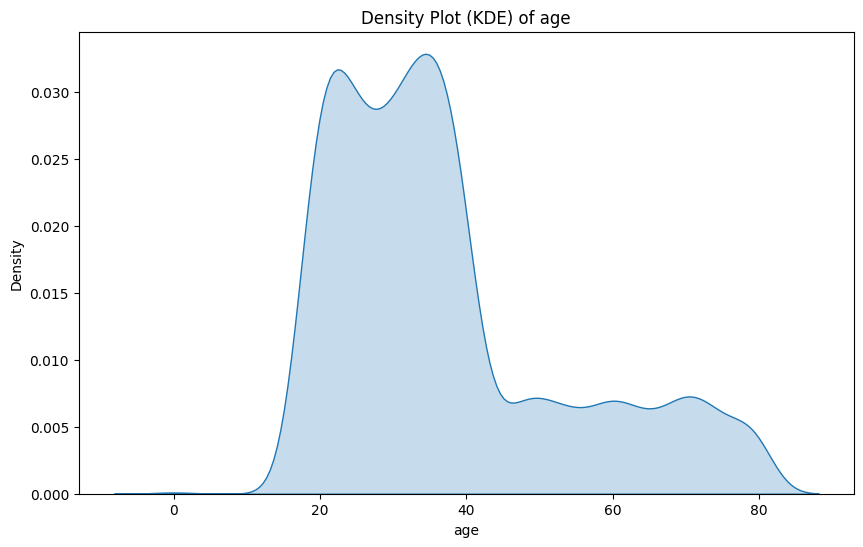

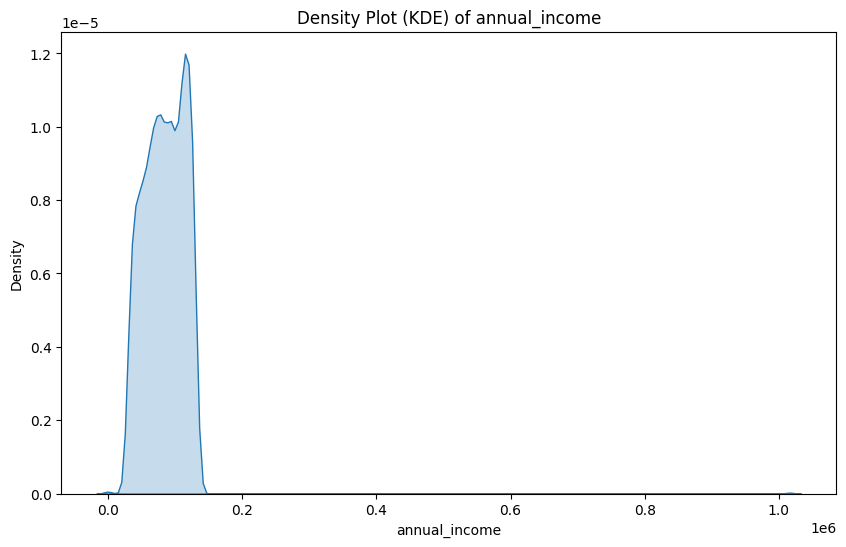

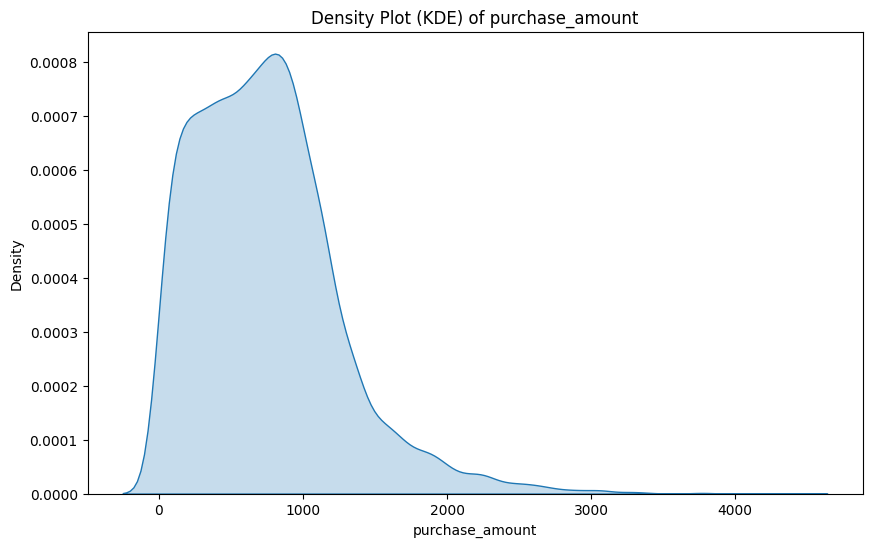

In [28]:
analyzer.Plotter.kde_plots()

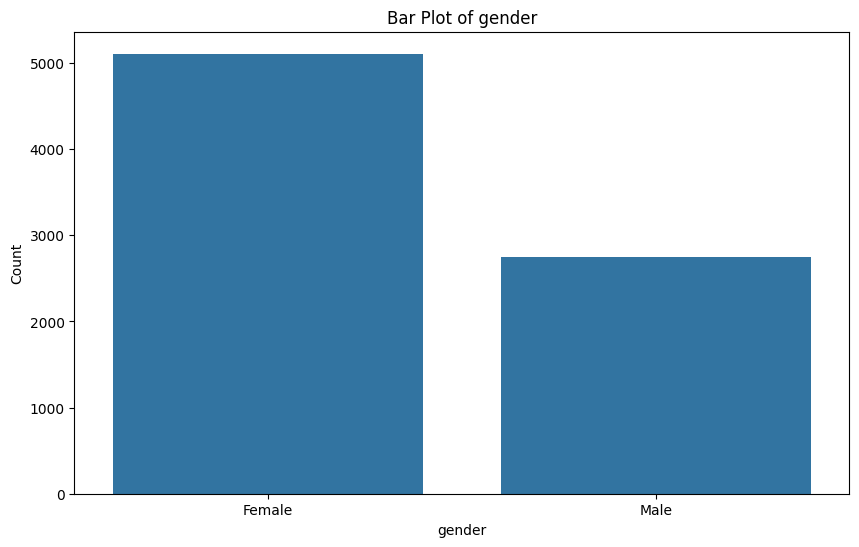

In [29]:
analyzer.Plotter.bar_plots()

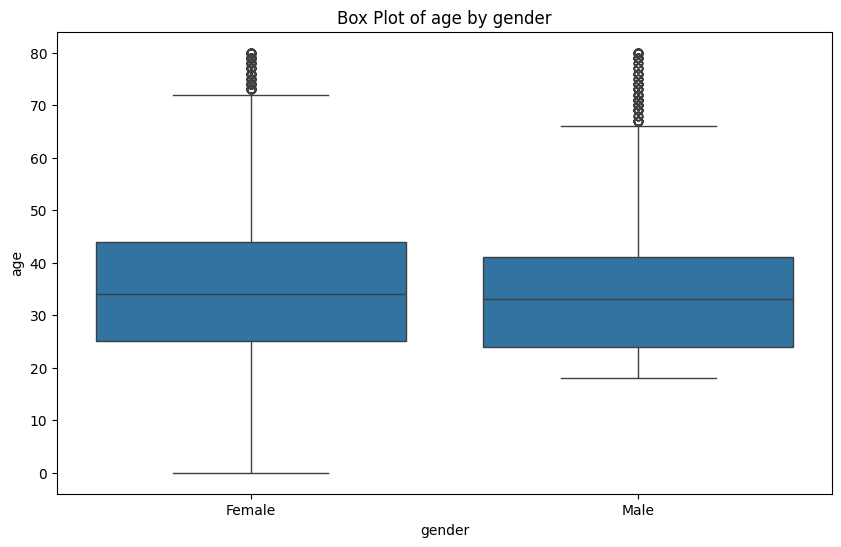

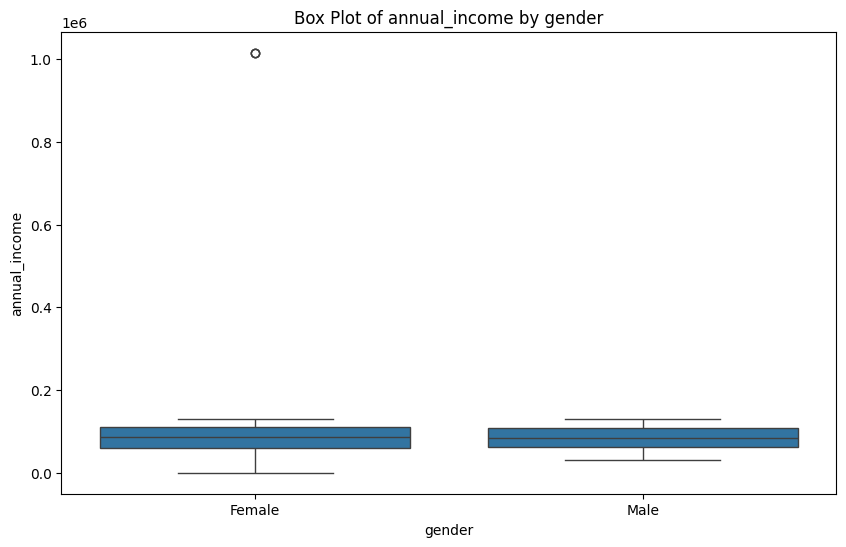

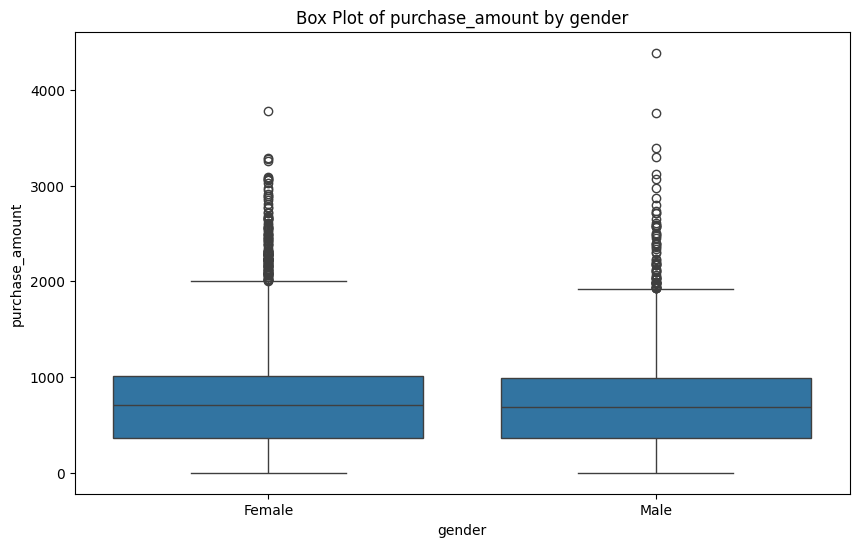

In [30]:
analyzer.Plotter.numerical_categorical_relationships()

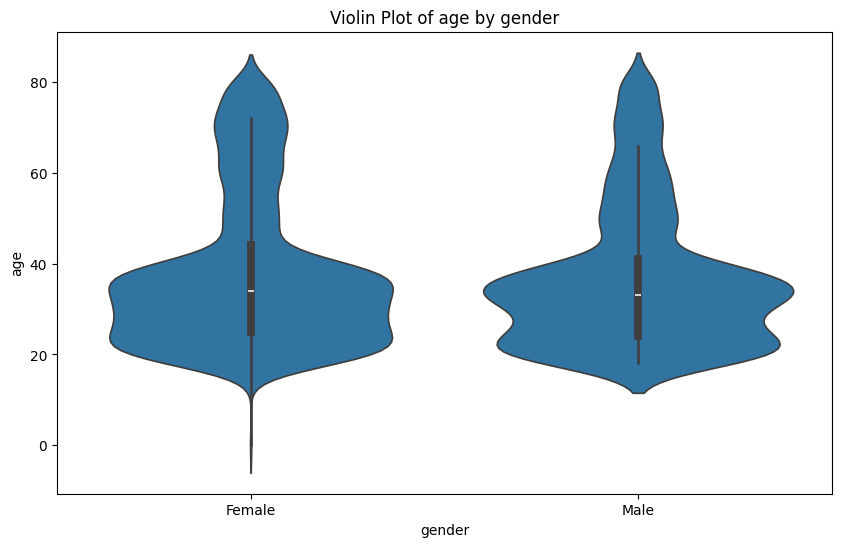

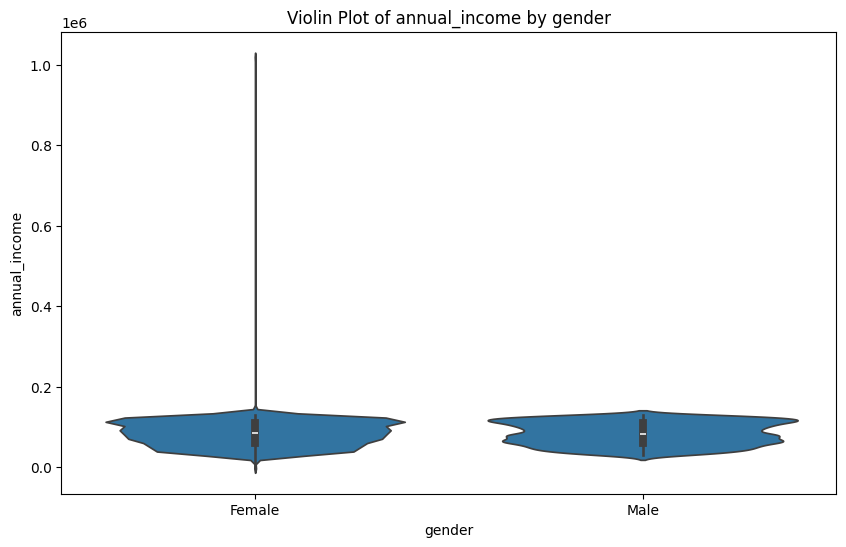

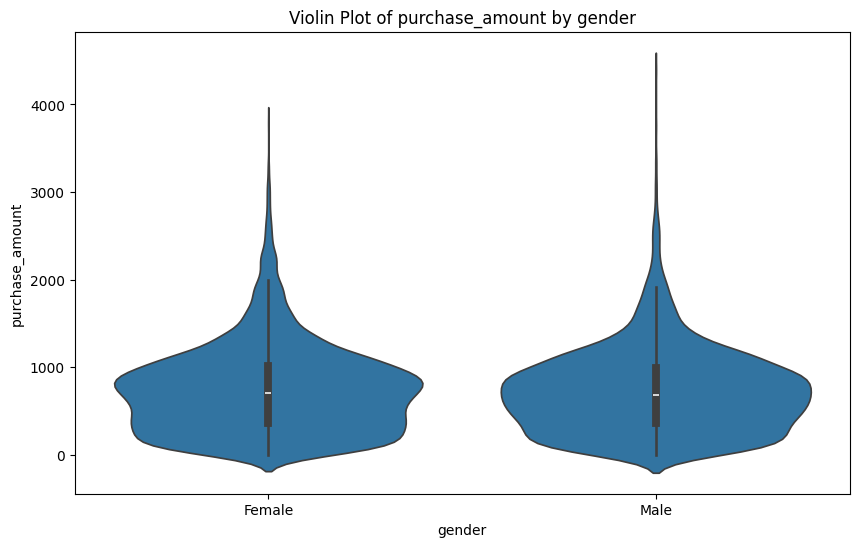

In [31]:
analyzer.Plotter.violin_plots()

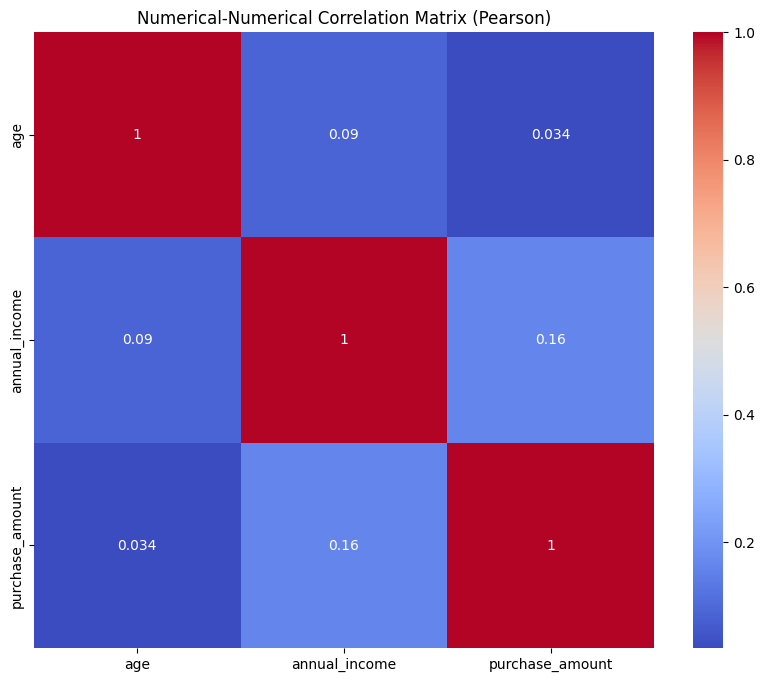

In [32]:
analyzer.Correlation.numerical_correlation_matrix(plot=True);

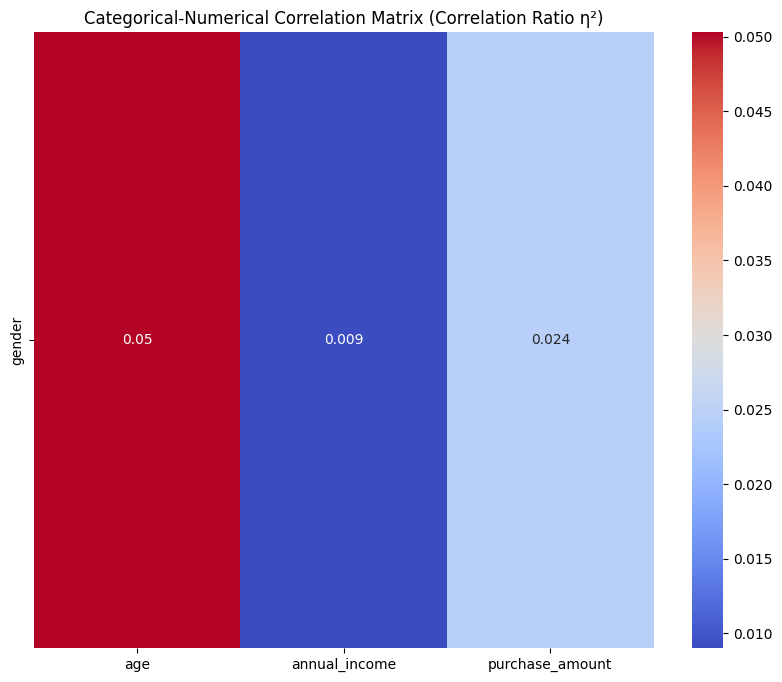

In [33]:
analyzer.Correlation.categorical_numerical_correlation_matrix(plot=True);

# Finding Outliers

In [34]:
analyzer.get_row_count;

Total number of rows: 7855


In [35]:
for column in numerical_columns:
    analyzer.FeatureEngineer.find_outliers_iqr(column=column, drop=True);

[  44   77   78   81   93  104  126  176  230  252  253  284  295  310
  332  341  348  359  373  377  391  395  398  399  419  423  425  439
  449  502  555  558  563  565  572  651  671  672  675  681  686  707
  737  745  775  783  784  792  802  809  822  836  852  853  866  882
  891  895  910  911  918  945  950  955  966  977 1008 1010 1027 1040
 1043 1068 1124 1142 1211 1244 1254 1276 1279 1282 1293 1304 1310 1318
 1334 1340 1343 1390 1397 1413 1427 1433 1440 1503 1526 1584 1609 1611
 1623 1647 1650 1690 1699 1740 1747 1756 1768 1775 1778 1803 1825 1833
 1853 1870 1881 1884 1895 1897 1898 1908 1915 1919 1937 1938 1947 1952
 1969]
Row indices with outliers in column 'age' based on IQR method:
[154, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 287, 288, 289, 290, 291, 292, 293, 294, 332, 370, 371, 457, 458, 649, 650, 651, 652, 653, 654, 655, 883, 884, 885, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1099, 1100, 1101, 1148, 1149, 1150, 1

In [36]:
analyzer.get_row_count;

Total number of rows: 7149


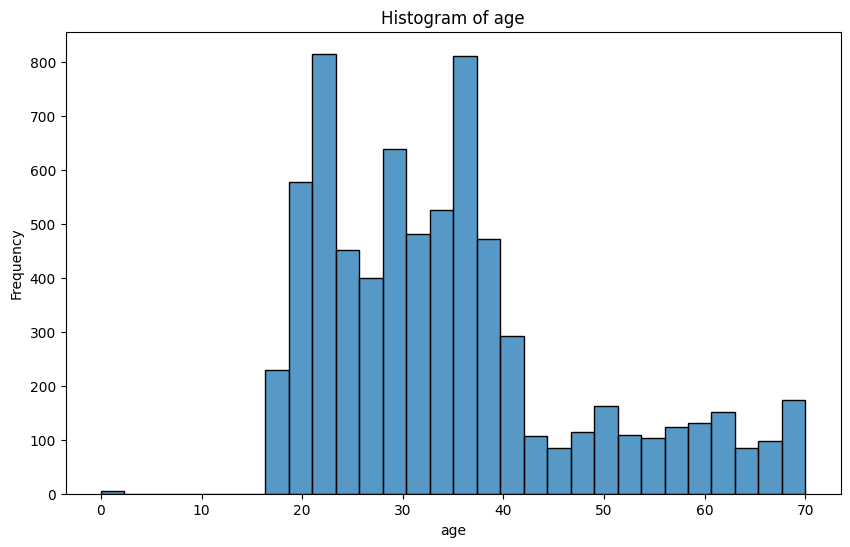

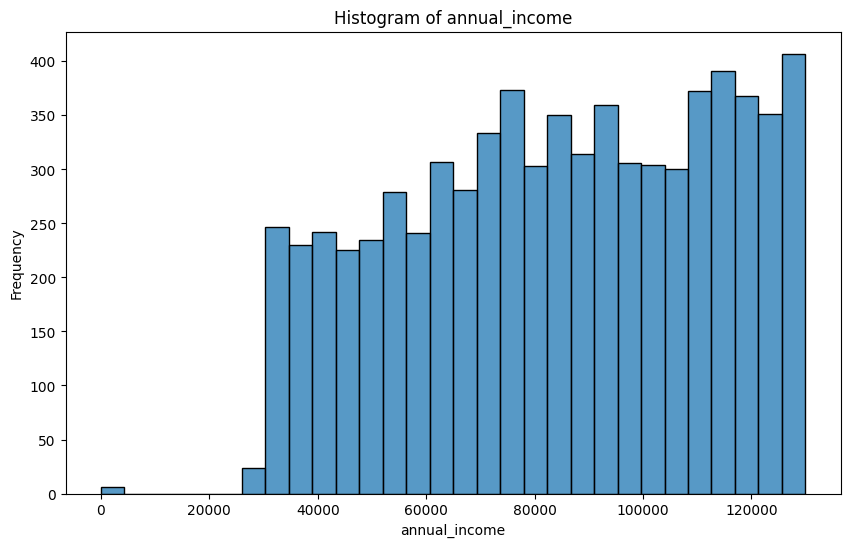

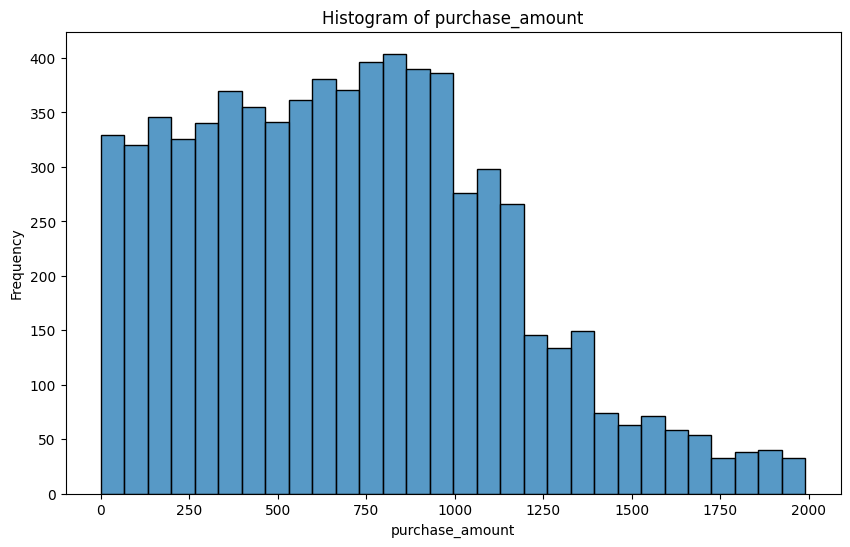

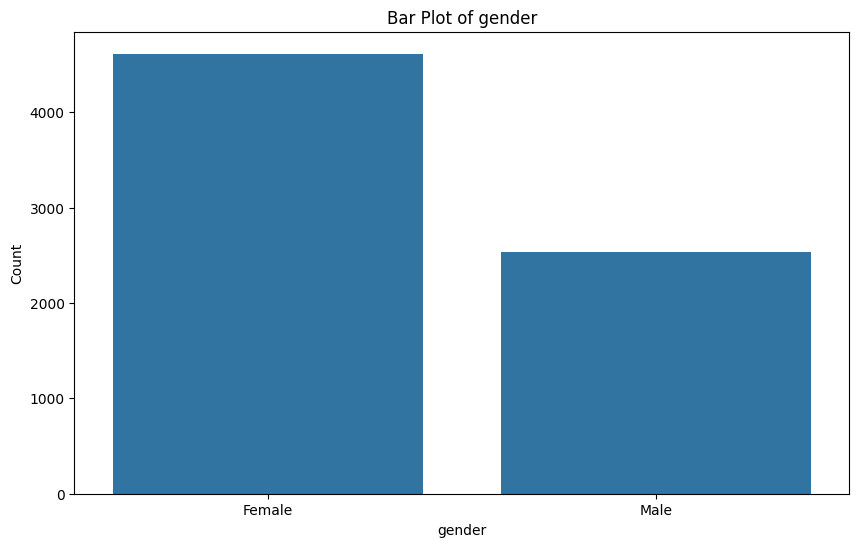

In [37]:
analyzer.Plotter.histograms()

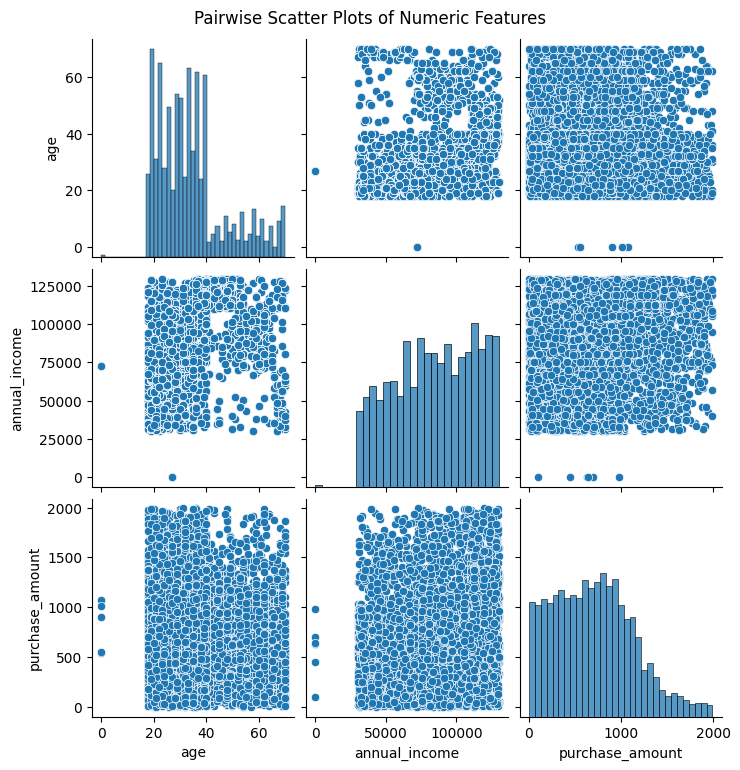

In [38]:
analyzer.Plotter.pairwise_scatter()

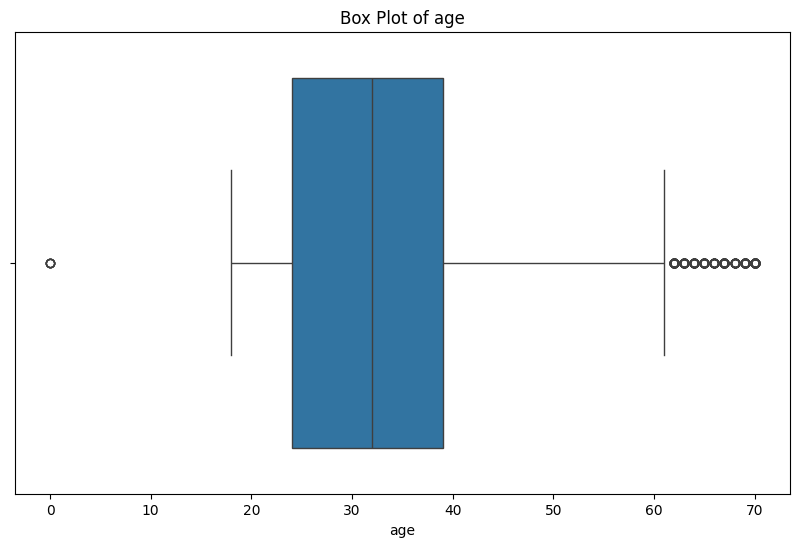

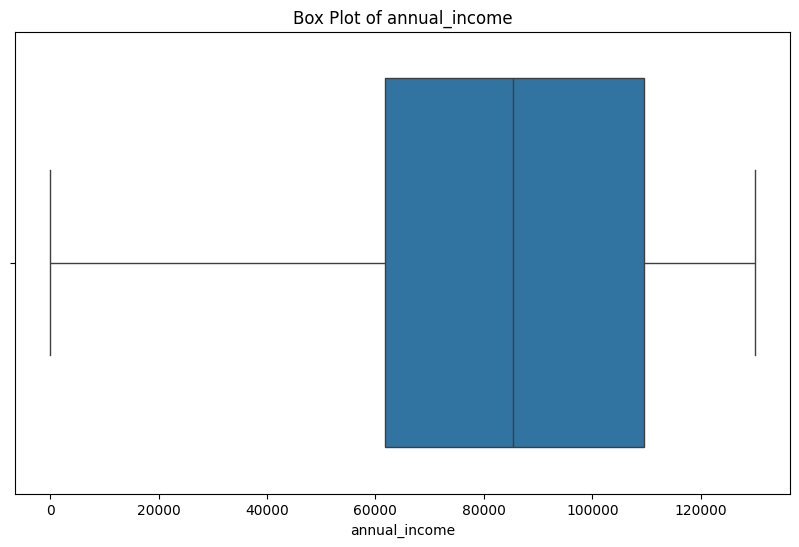

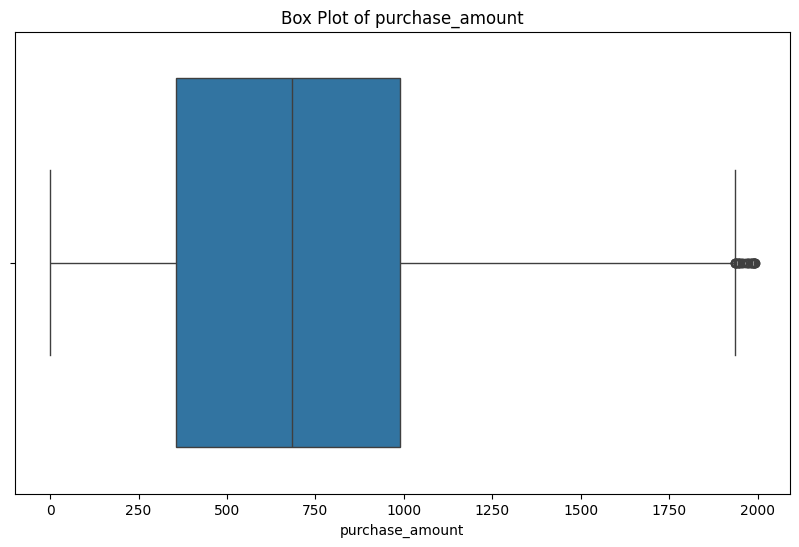

In [39]:
analyzer.Plotter.box_plots()

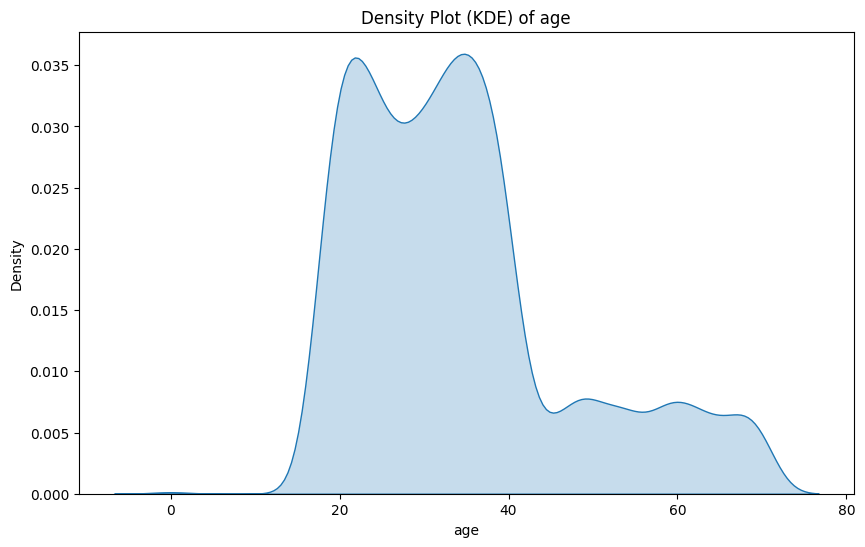

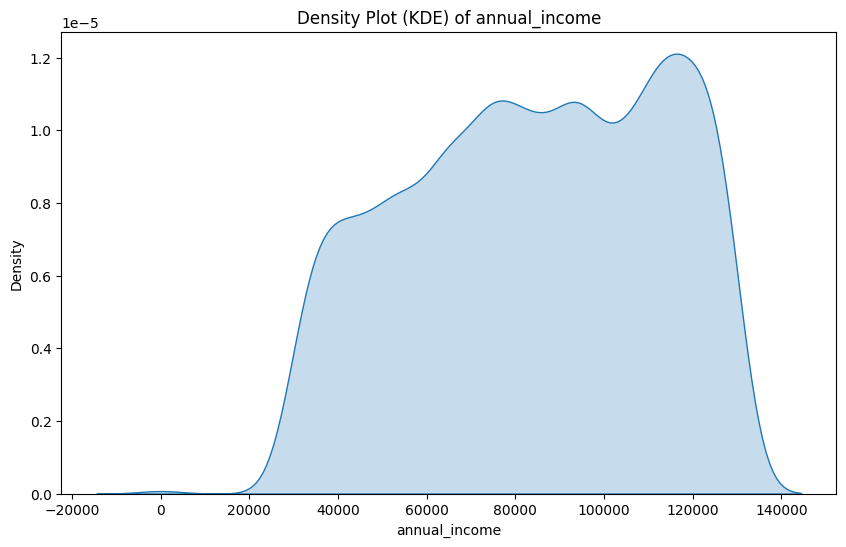

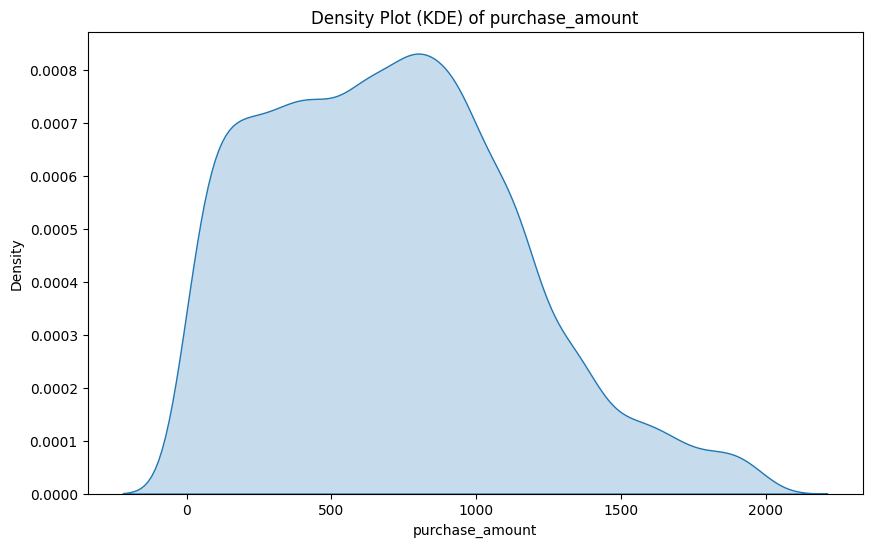

In [40]:
analyzer.Plotter.kde_plots()

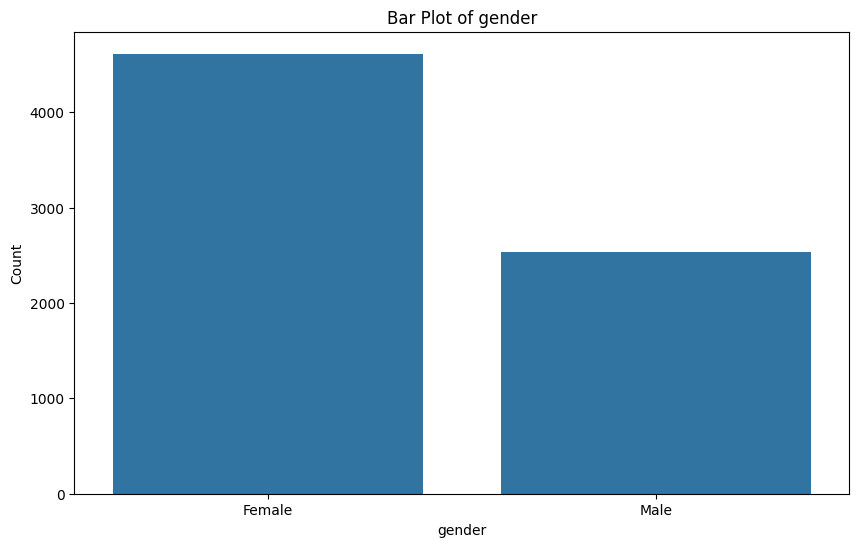

In [41]:
analyzer.Plotter.bar_plots()

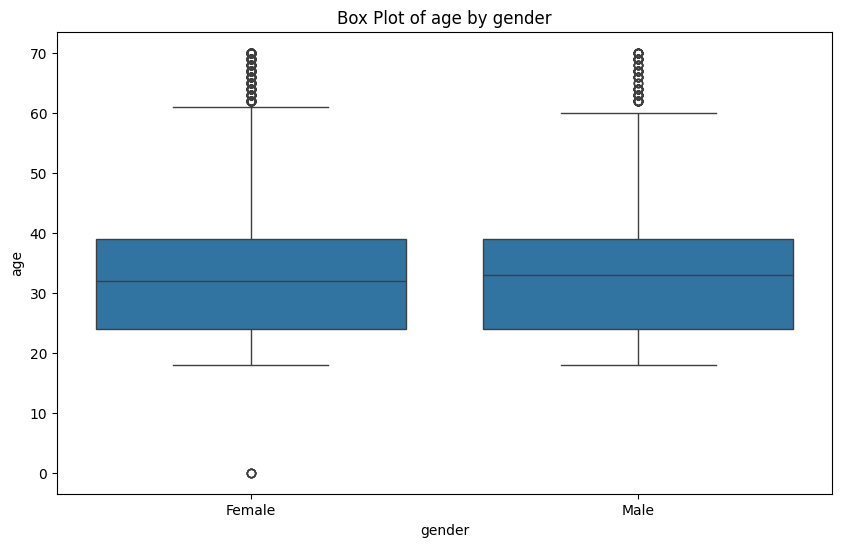

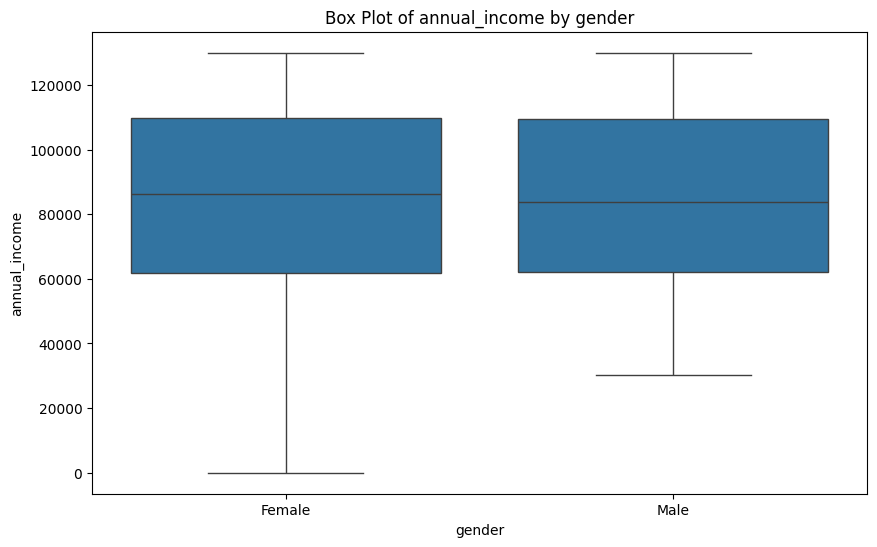

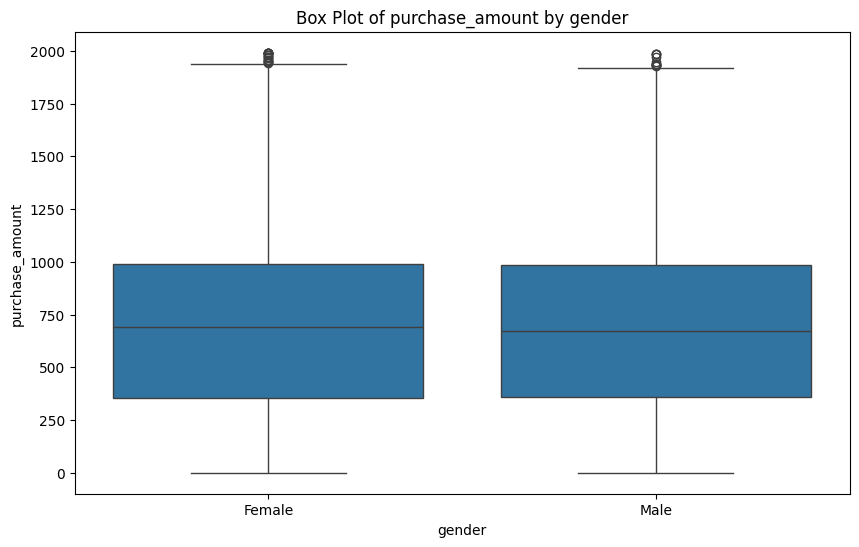

In [42]:
analyzer.Plotter.numerical_categorical_relationships()

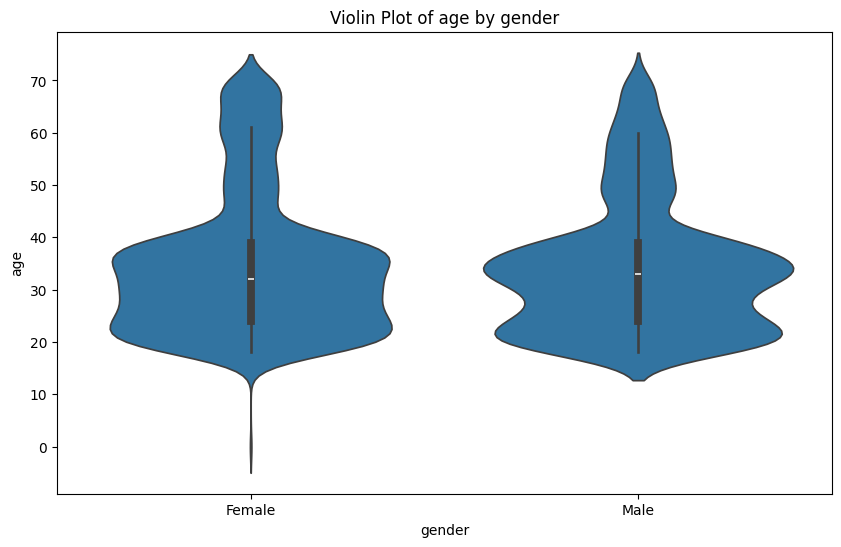

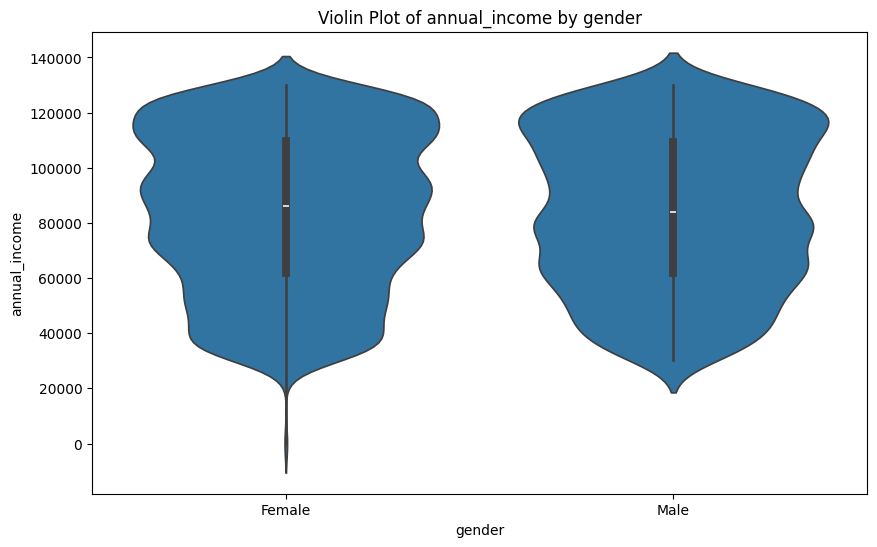

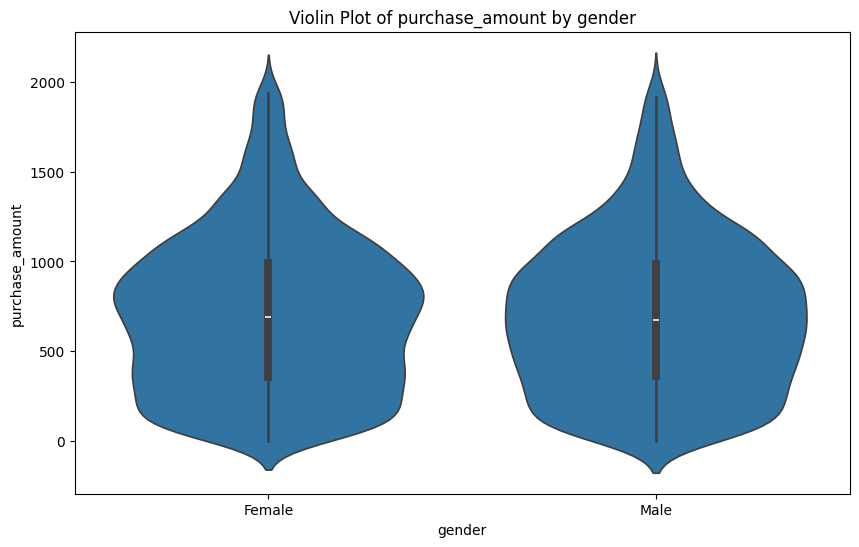

In [43]:
analyzer.Plotter.violin_plots()

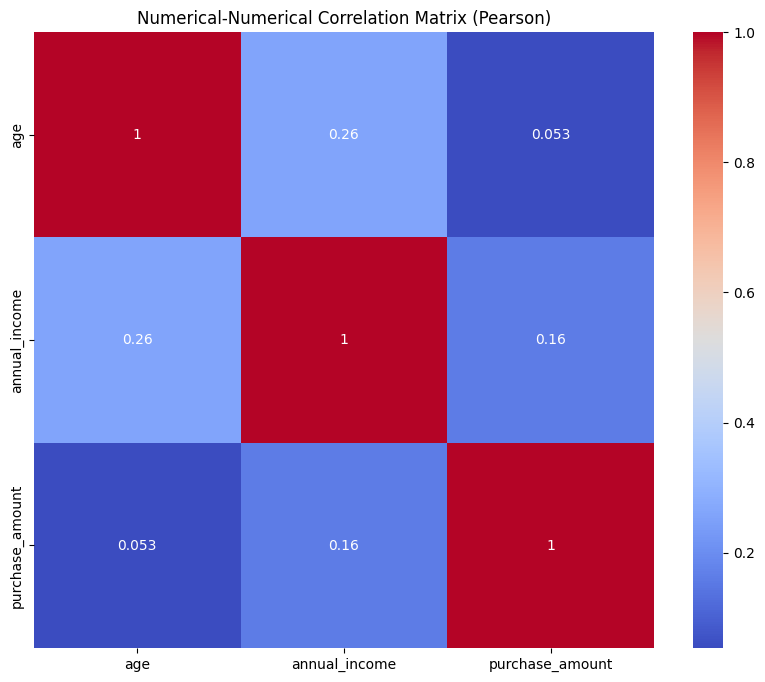

In [44]:
analyzer.Correlation.numerical_correlation_matrix(plot=True, numerical_columns= numerical_columns);

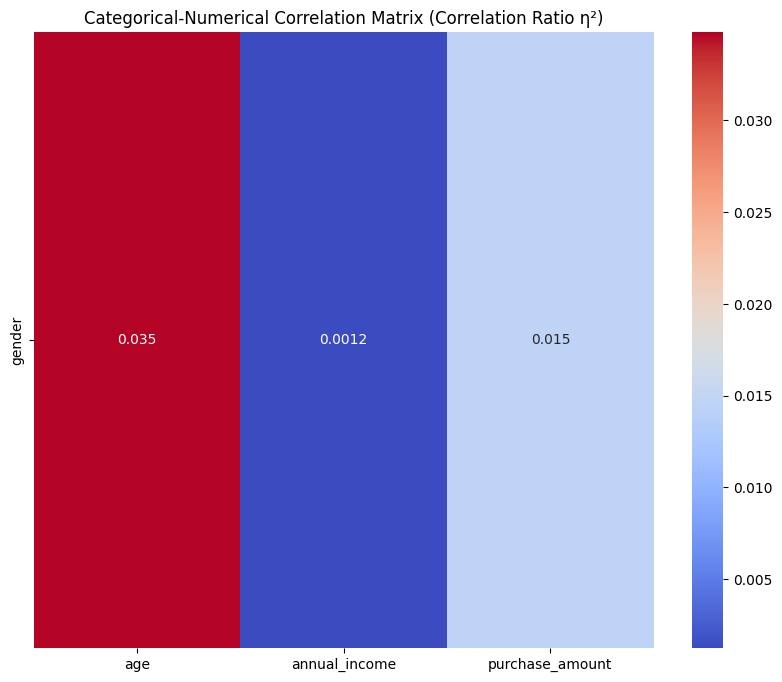

In [45]:
analyzer.Correlation.categorical_numerical_correlation_matrix(plot=True);

In [46]:
# analyzer.separate_and_save_datasets(train_filename='data/no_outlier_dropped_train_dataset.csv', test_filename='data/no_outlier__dropped_test_dataset.csv')

### Instead of losing data we could try to impute data with median, mean, or other machine learning algorith due to time constraints I am skipping that option.

Also lets add rfm

In [47]:
analyzer.FeatureEngineer.calculate_rfm()

customer_id  purchase_year  purchase_month   age  gender  annual_income  \
0               1           2023               7  40.0  Female       119228.0   
2               1           2023              11  40.0  Female       119228.0   
3               1           2023              12  40.0  Female       119228.0   
4               1           2024               2  40.0  Female       119228.0   
5               1           2024               3  40.0  Female       119228.0   
...           ...            ...             ...   ...     ...            ...   
7879         2000           2023               9  35.0  Female        32476.0   
7880         2000           2023              11  35.0  Female        32476.0   
7881         2000           2024               1  35.0  Female        32476.0   
7882         2000           2024               2  35.0  Female        32476.0   
7883         2000           2024               4  35.0  Female        32476.0   

                 purchase_date  purchase_amount  next_month_purchase_amount  \
0    2023-07-20 19:16:58+03:00           725.54                     2023.40   
2    2023-11-22 19:16:58+03:00          1415.56                     1703.75   
3    2023-12-23 19:16:58+03:00          1703.75                      216.73   
4    2024-02-10 19:16:58+03:00           216.73                     1102.69   
5    2024-03-19 19:16:58+03:00          1102.69                      261.08   
...                        ...              ...                         ...   
7879 2023-09-14 19:16:58+03:00           915.30                      972.72   
7880 2023-11-24 19:16:58+03:00           972.72                       33.09   
7881 2024-01-21 19:16:58+03:00            33.09                      618.88   
7882 2024-02-14 19:16:58+03:00           618.88                      707.98   
7883 2024-04-02 19:16:58+03:00           707.98                         NaN   

      gender_Female  gender_Male  Recency  Frequency  Monetary  
0              True        False       25          6   5425.35  
2              True        False       25          6   5425.35  
3              True        False       25          6   5425.35  
4              True        False       25          6   5425.35  
5              True        False       25          6   5425.35  
...             ...          ...      ...        ...       ...  
7879           True        False       51          6   3349.78  
7880           True        False       51          6   3349.78  
7881           True        False       51          6   3349.78  
7882           True        False       51          6   3349.78  
7883           True        False       51          6   3349.78  

[7149 rows x 14 columns]

In [48]:
analyzer.Statics.get_all_statistics;

Number of unique customer: 1778
Number of rows affected by NaN values: 35
Number of rows affected by Inf values: 0
Number of rows affected by Invalid values: 0

Count of NaN values in each column:
customer_id                      0
purchase_year                    0
purchase_month                   0
age                              0
gender                           0
annual_income                    0
purchase_date                    0
purchase_amount                  0
next_month_purchase_amount    1752
gender_Female                    0
gender_Male                      0
Recency                          0
Frequency                        0
Monetary                         0
dtype: int64

Count of Inf values in each numerical column:
age                0
annual_income      0
purchase_amount    0
dtype: int64

Count of Negative values in each numerical column:
age                0
annual_income      0
purchase_amount    0
dtype: int64
Duplicate row count: 0


In [49]:
analyzer.FeatureEngineer.drop_invalid_rows();

Initial row count: 7149
Row count after dropping NaNs: 7149
Row count after dropping Infs: 7149
Row count after dropping negative values: 7149


In [50]:
analyzer.Statics.get_all_statistics;

Number of unique customer: 1778
Number of rows affected by NaN values: 35
Number of rows affected by Inf values: 0
Number of rows affected by Invalid values: 0

Count of NaN values in each column:
customer_id                      0
purchase_year                    0
purchase_month                   0
age                              0
gender                           0
annual_income                    0
purchase_date                    0
purchase_amount                  0
next_month_purchase_amount    1752
gender_Female                    0
gender_Male                      0
Recency                          0
Frequency                        0
Monetary                         0
dtype: int64

Count of Inf values in each numerical column:
age                0
annual_income      0
purchase_amount    0
dtype: int64

Count of Negative values in each numerical column:
age                0
annual_income      0
purchase_amount    0
dtype: int64
Duplicate row count: 0


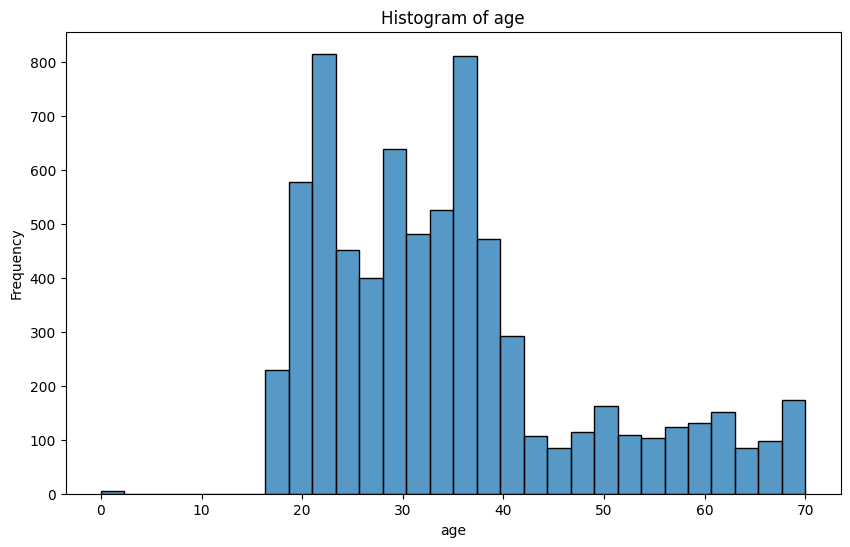

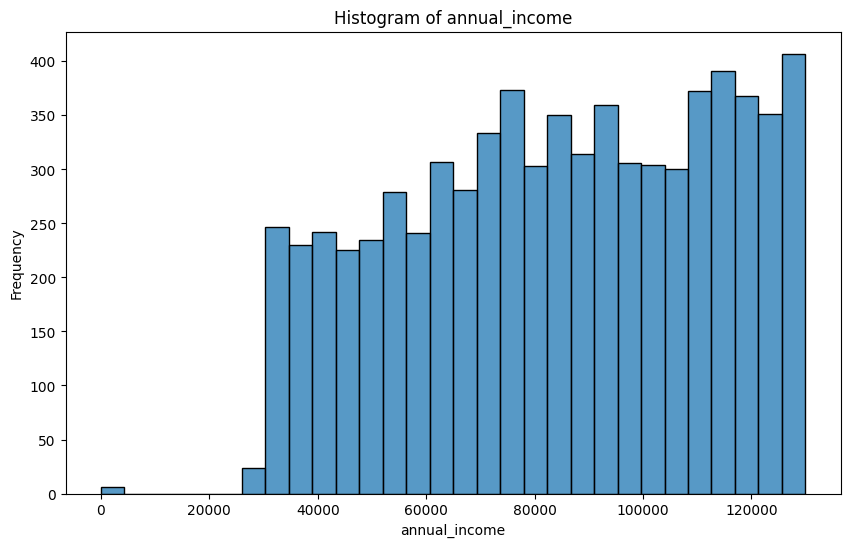

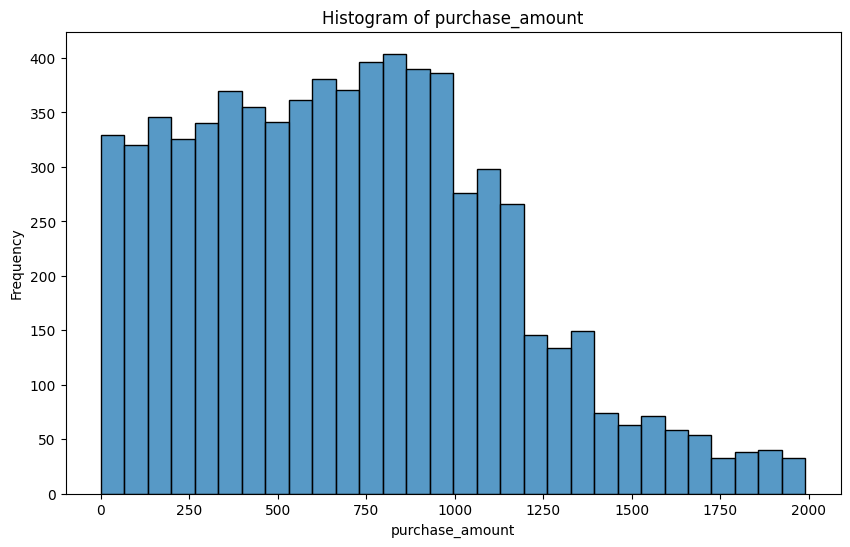

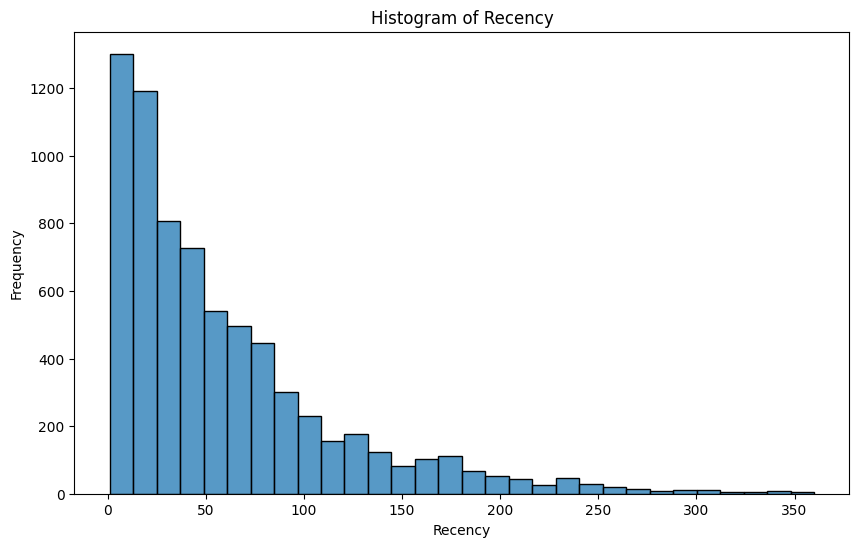

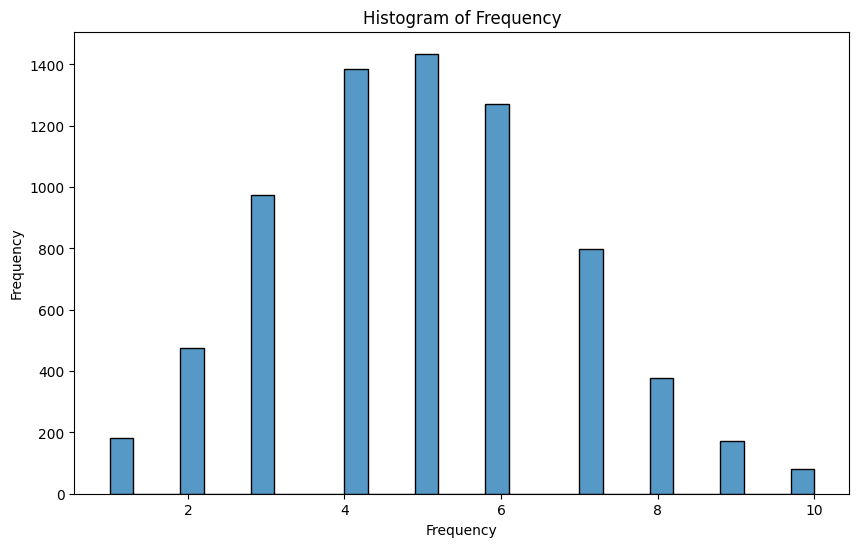

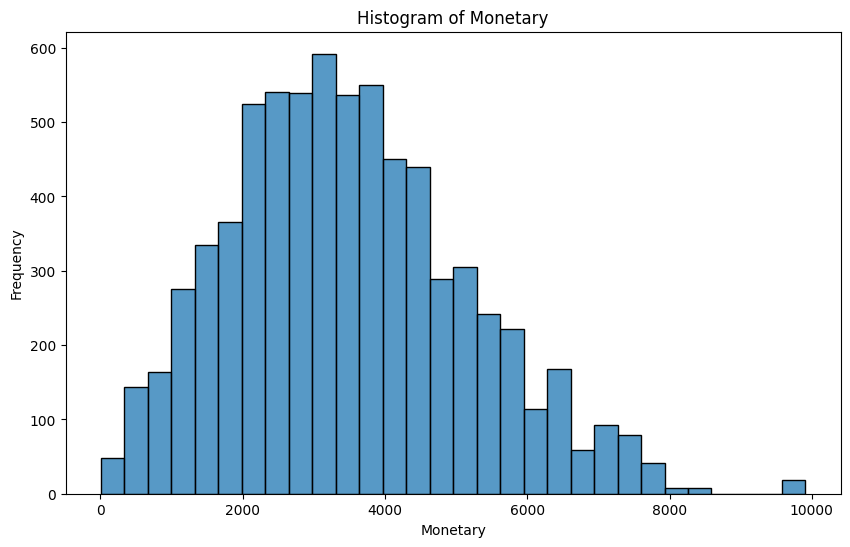

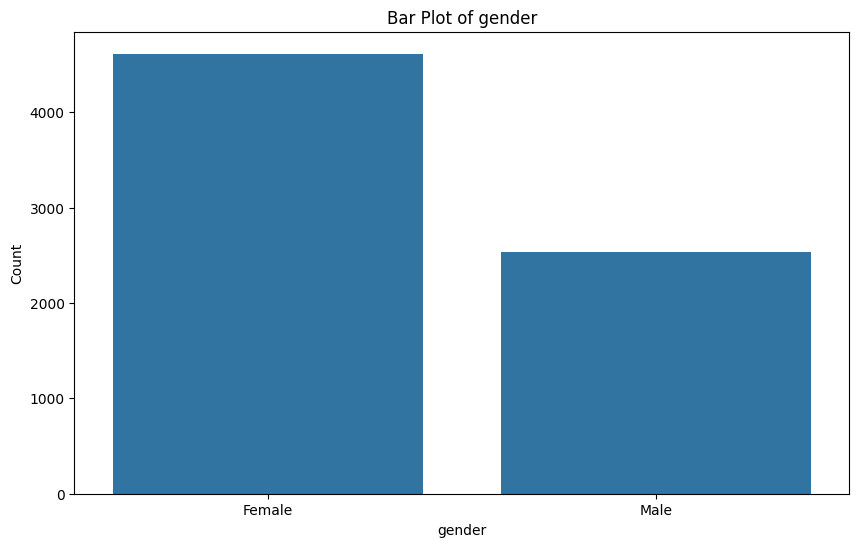

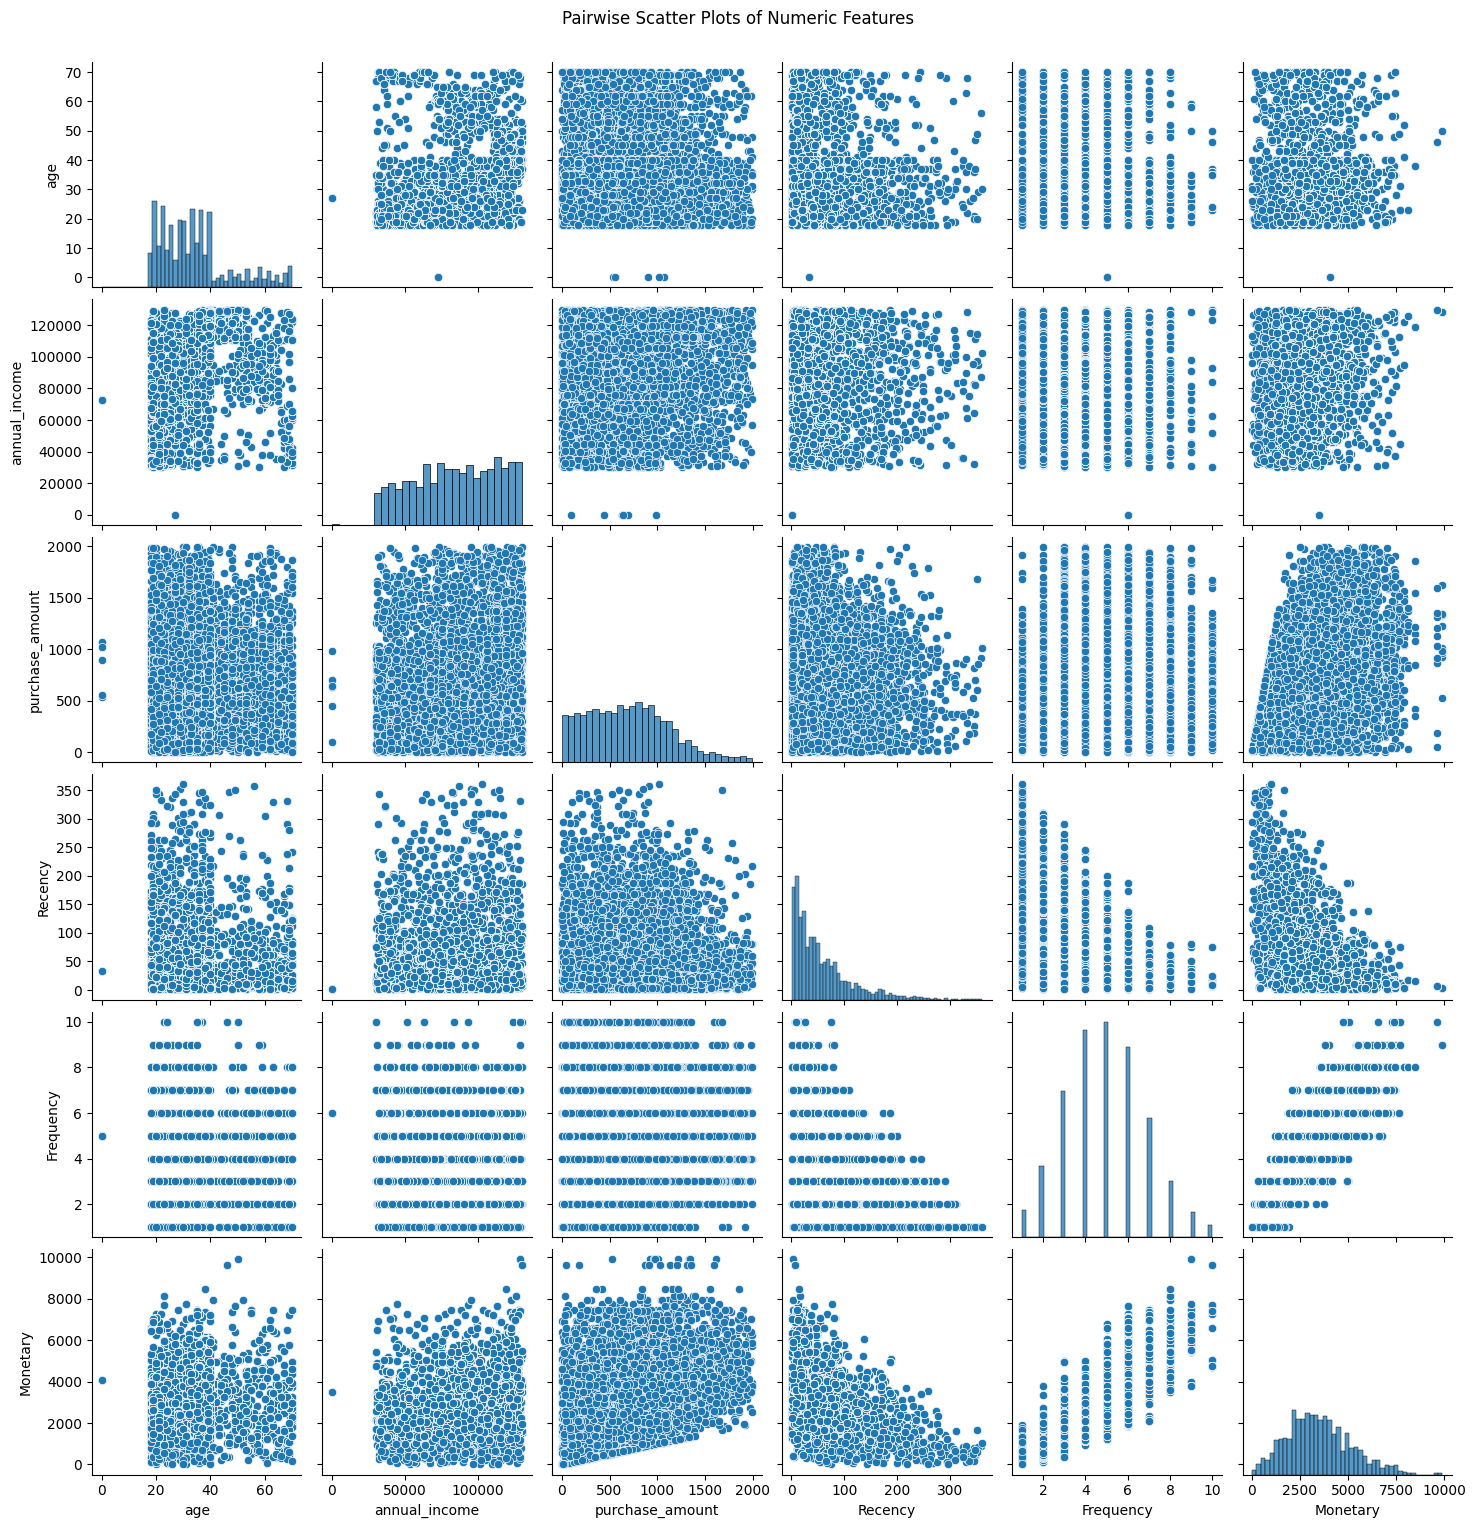

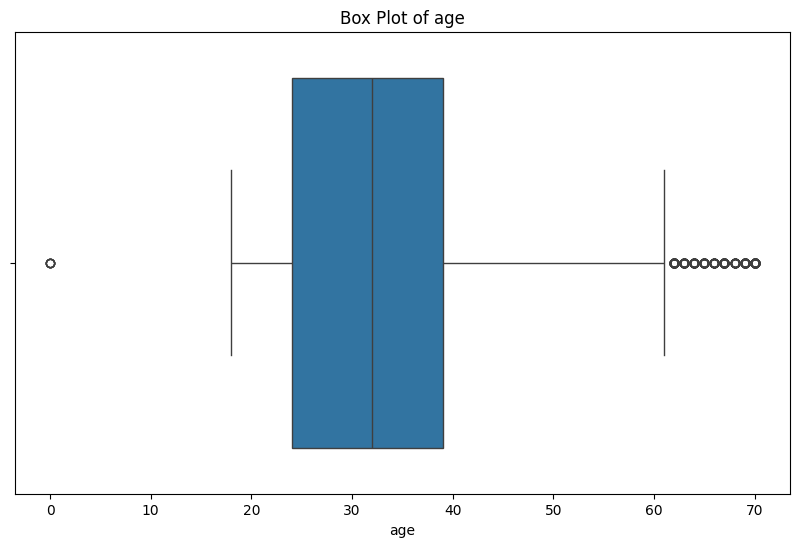

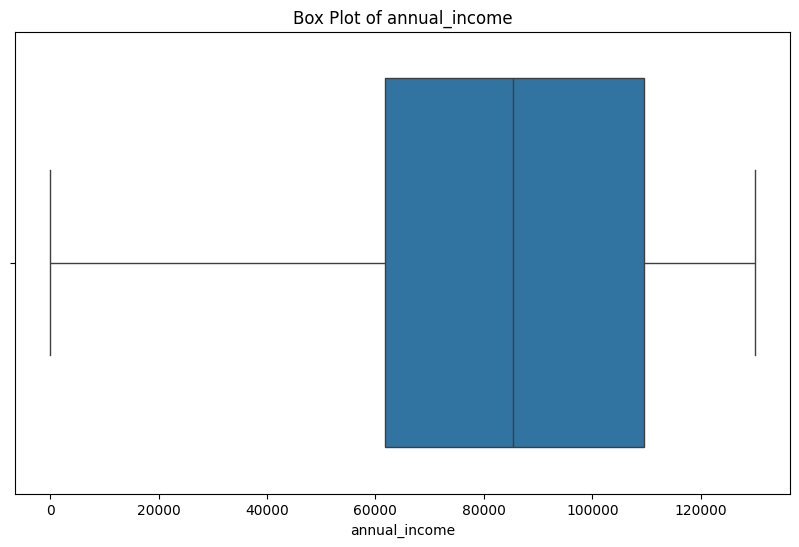

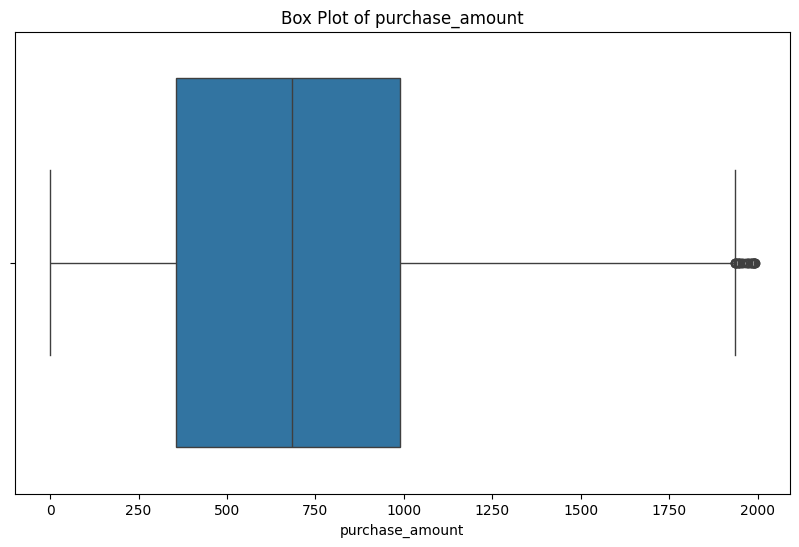

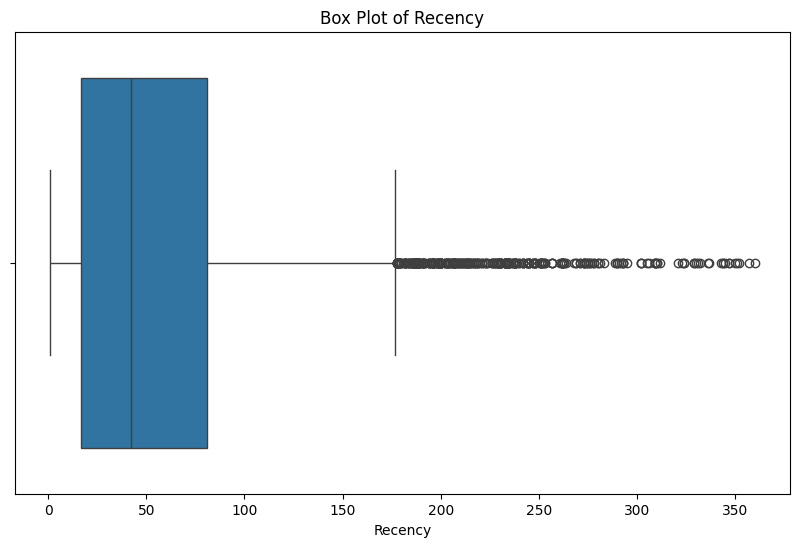

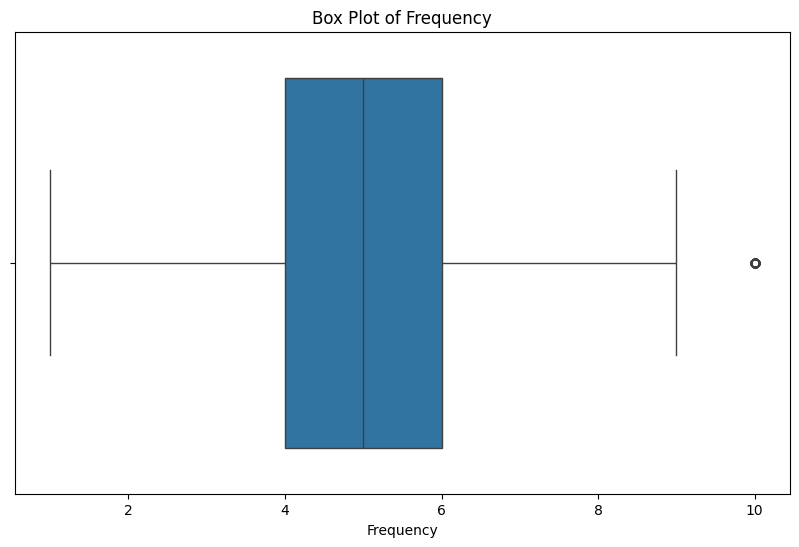

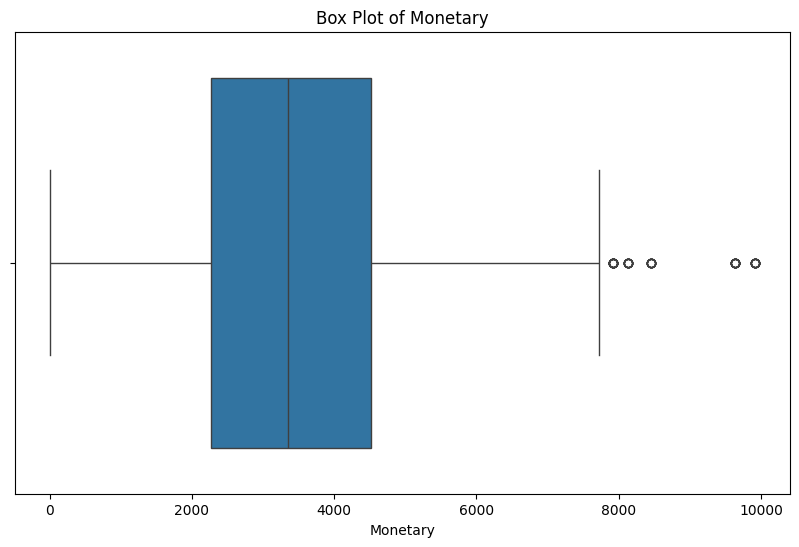

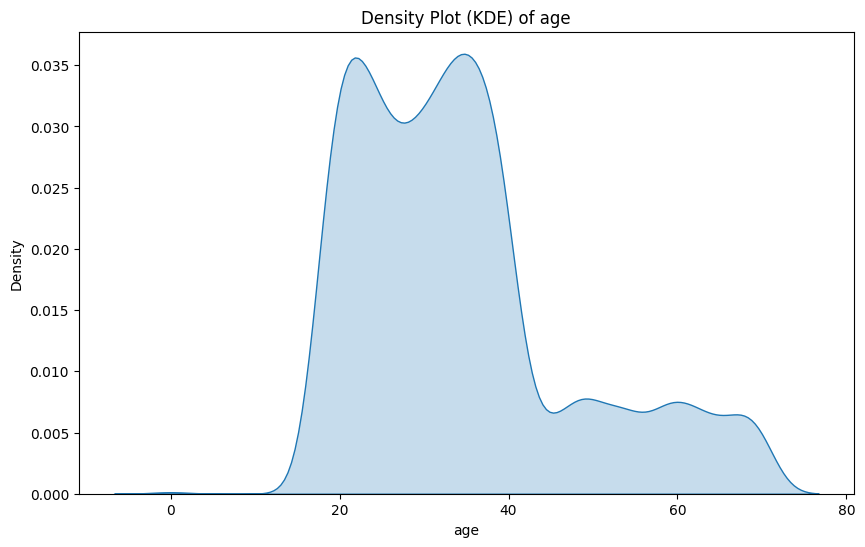

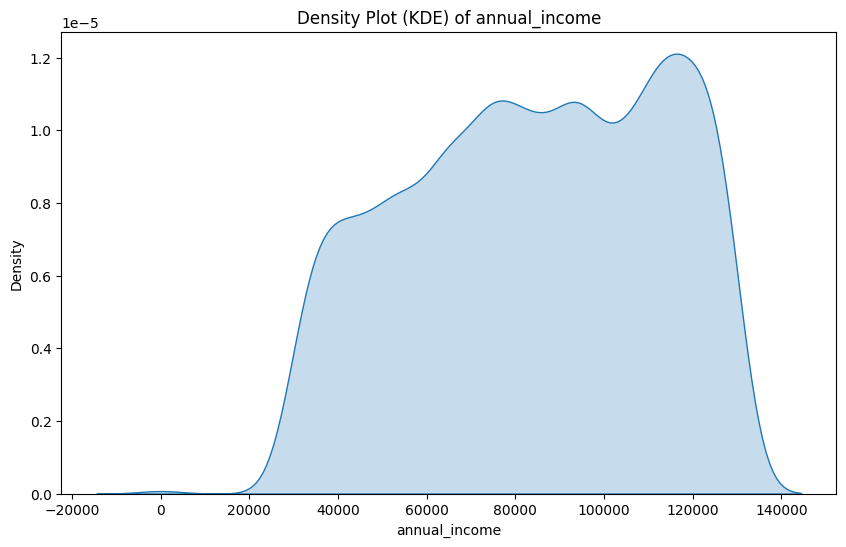

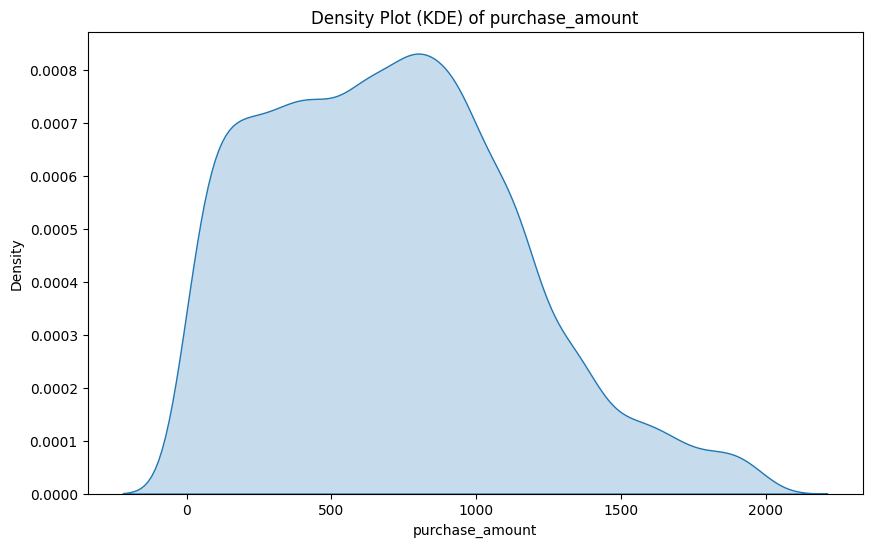

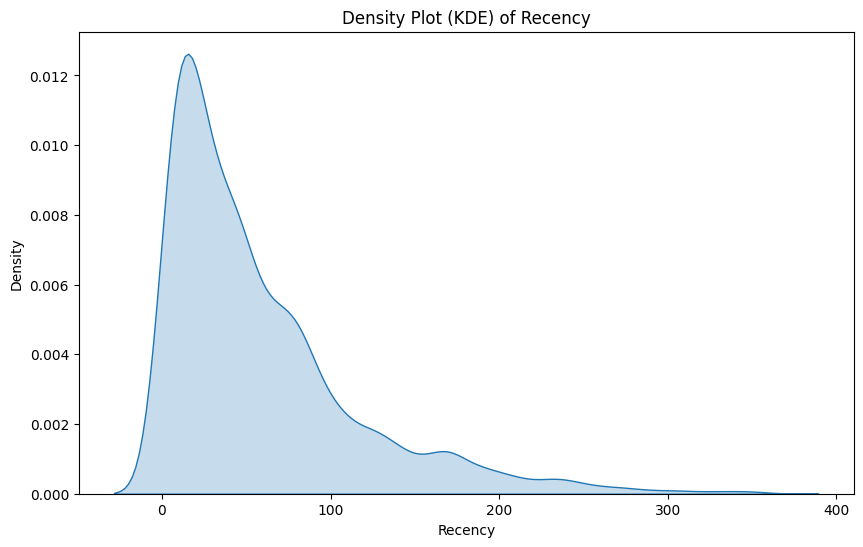

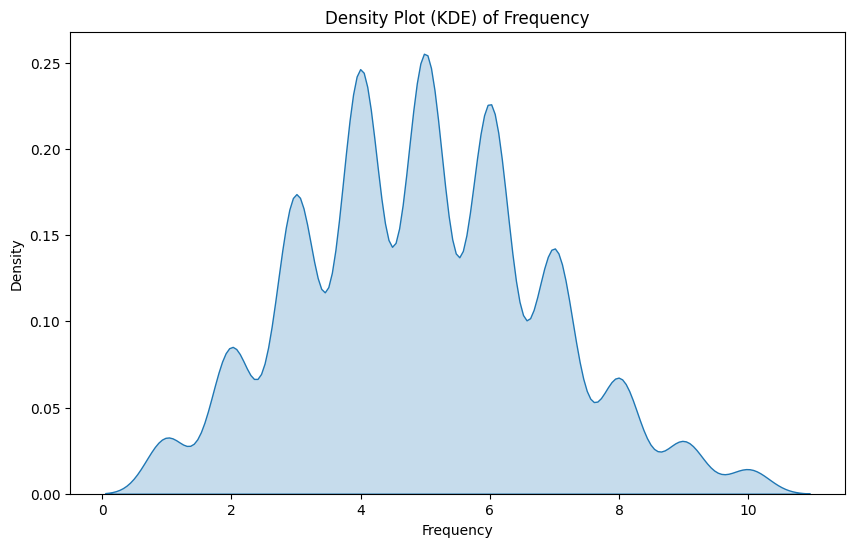

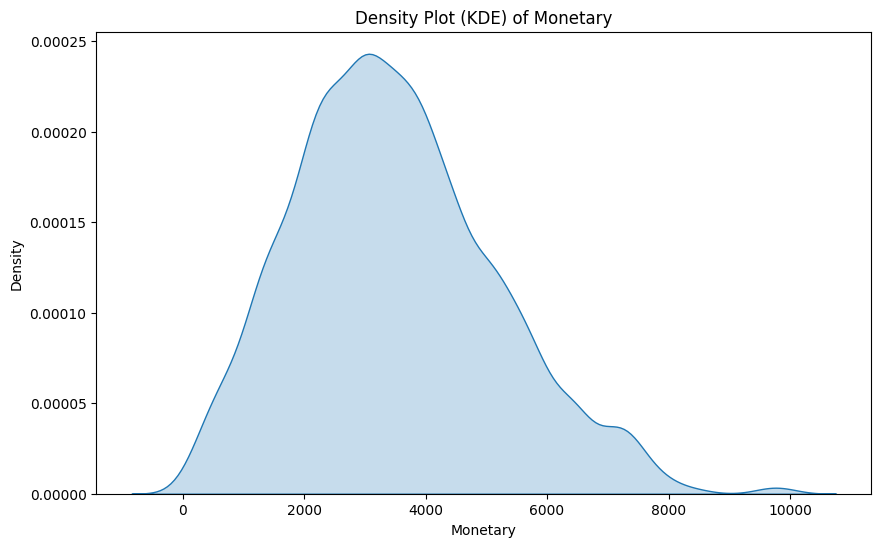

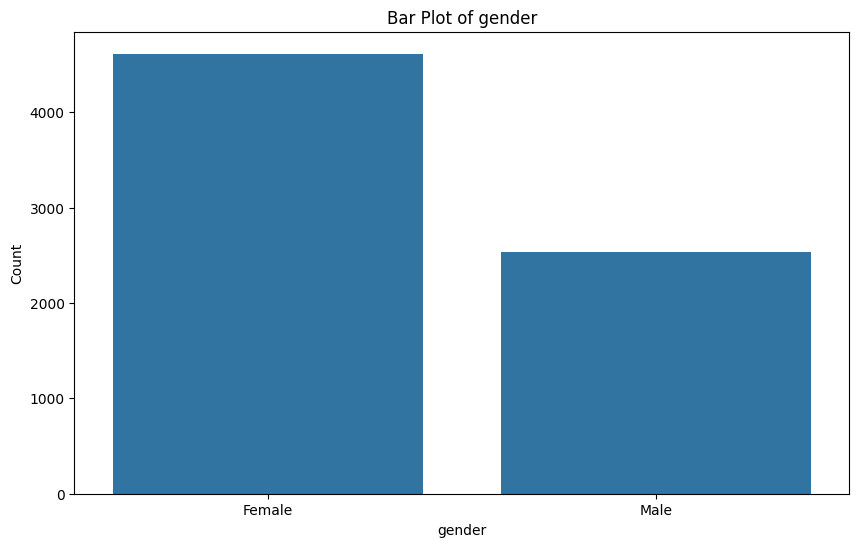

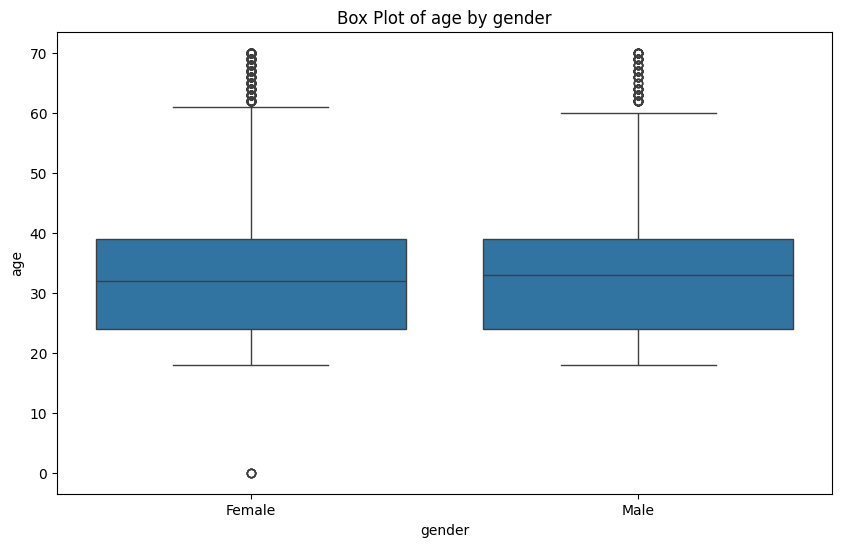

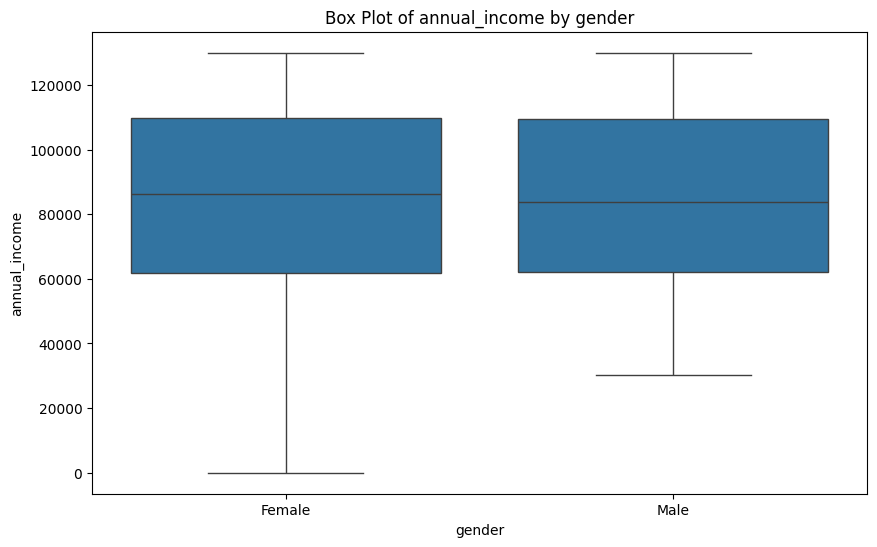

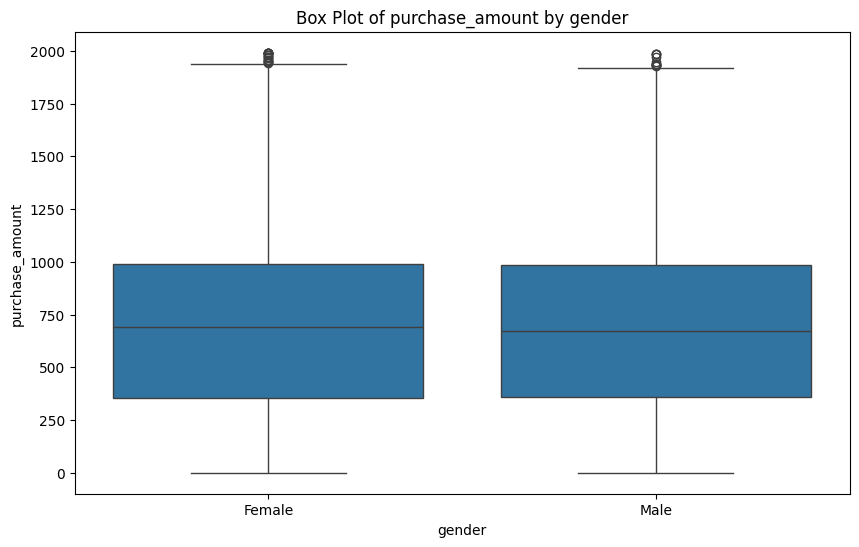

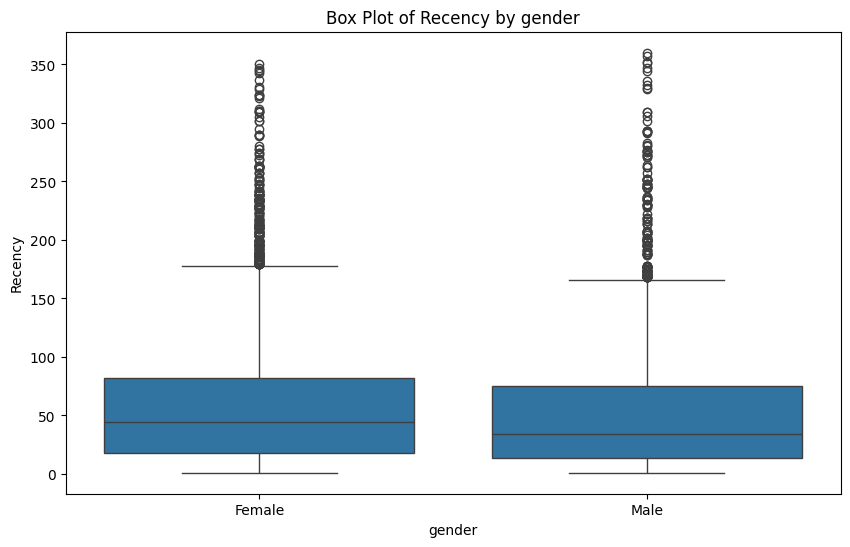

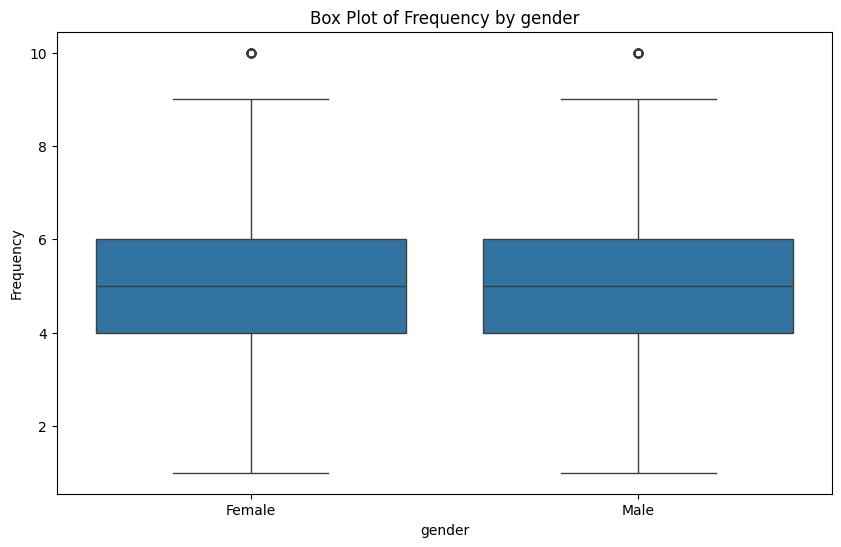

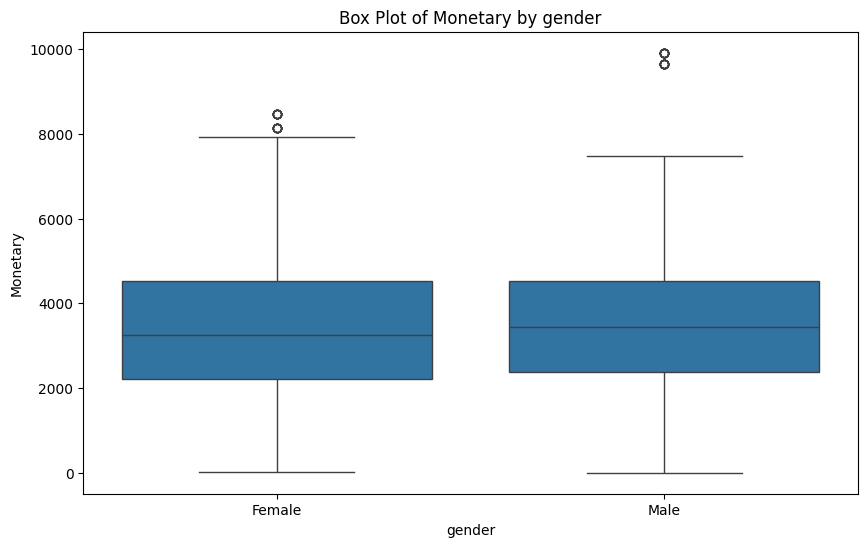

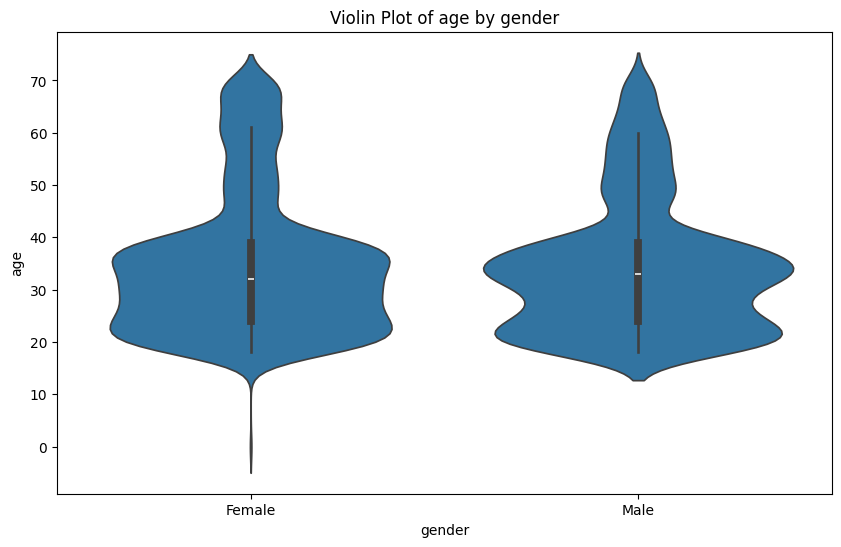

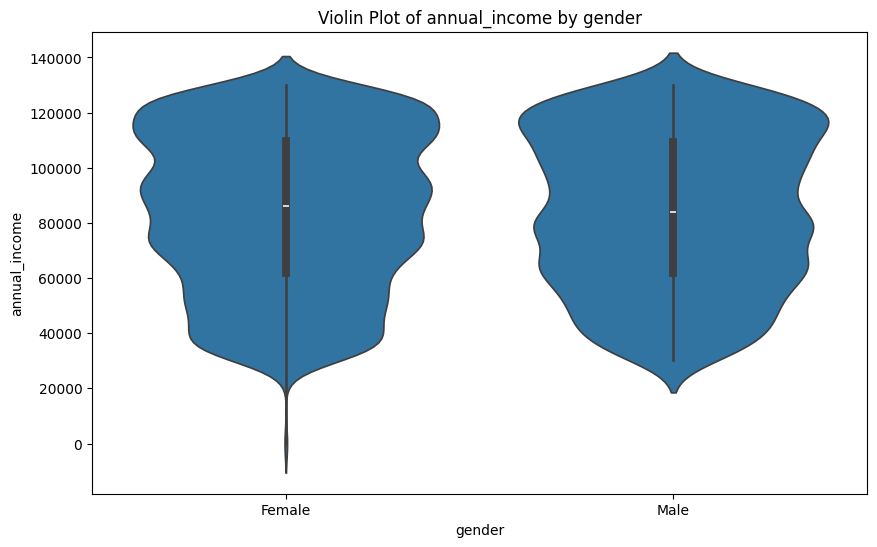

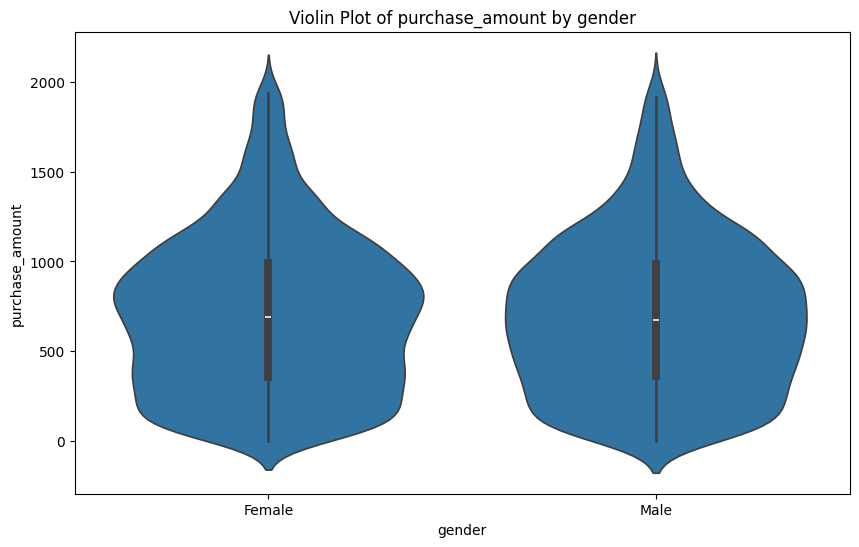

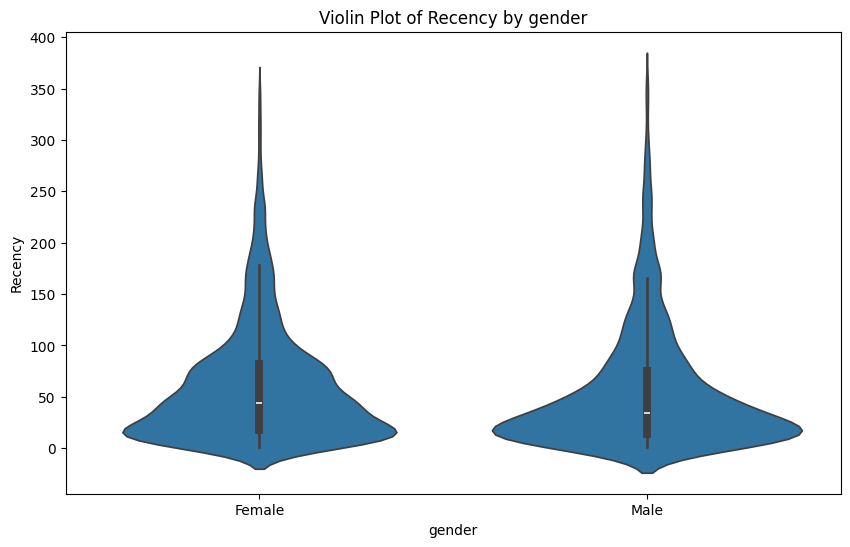

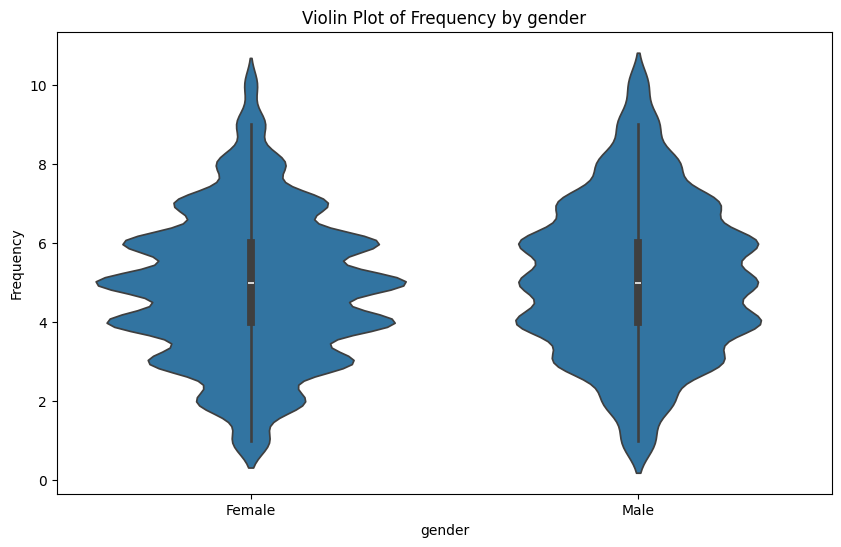

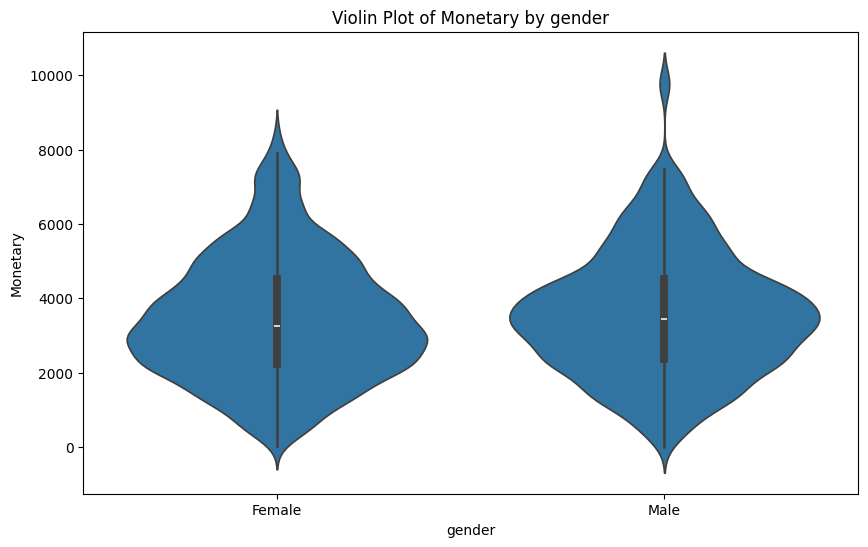

In [51]:
analyzer.Plotter.histograms();
analyzer.Plotter.pairwise_scatter();
analyzer.Plotter.box_plots();
analyzer.Plotter.kde_plots();
analyzer.Plotter.bar_plots();
analyzer.Plotter.numerical_categorical_relationships();
analyzer.Plotter.violin_plots();

In [52]:
analyzer.get_row_count;

Total number of rows: 7149


In [53]:
numerical_columns = ["Recency", "Frequency", "Monetary"]
for column in numerical_columns:
    analyzer.FeatureEngineer.find_outliers_iqr(column=column, drop=True);

[   4   11   15   23   25   28   43   56   61   69   71   85   87   91
  115  117  119  121  140  157  168  171  226  232  242  247  250  259
  261  268  275  318  326  339  344  369  378  386  389  396  406  409
  413  431  435  437  441  470  492  512  522  526  528  545  547  552
  569  592  601  612  617  618  619  620  631  640  643  648  667  676
  677  688  718  726  747  749  753  776  788  791  797  798  801  811
  817  829  830  839  845  851  868  875  879  881  886  892  907  914
  965  973  975  976  980  981  982  988  989  993  996 1001 1009 1033
 1041 1057 1061 1067 1074 1113 1168 1169 1179 1187 1206 1225 1227 1230
 1243 1248 1259 1288 1291 1298 1328 1337 1342 1356 1359 1363 1380 1405
 1414 1419 1426 1441 1450 1458 1483 1488 1496 1504 1516 1522 1523 1552
 1562 1563 1579 1583 1586 1600 1610 1616 1621 1624 1646 1659 1671 1678
 1685 1711 1725 1743 1757 1762 1764 1769 1784 1792 1802 1810 1834 1867
 1890 1900 1912 1917 1918 1923 1940 1944 1945 1955 1963 1980 1983 1984
 1998]

In [54]:
analyzer.get_row_count;

Total number of rows: 6655


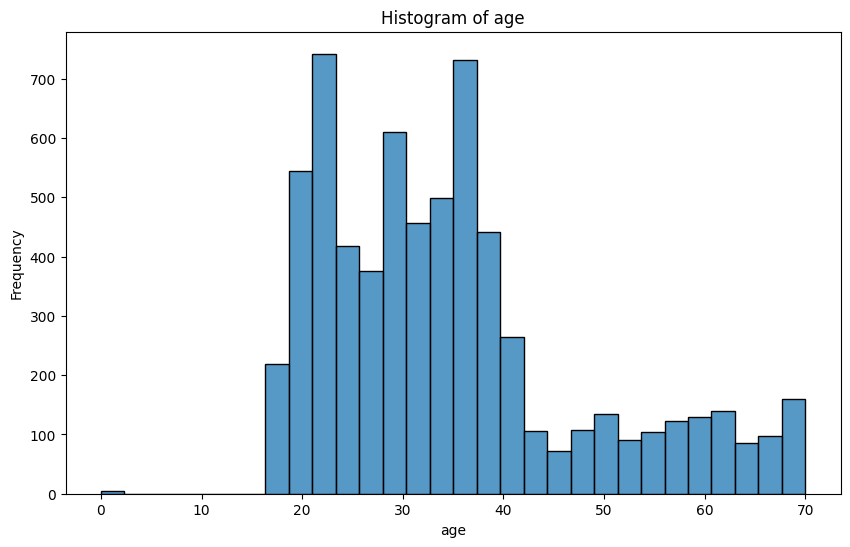

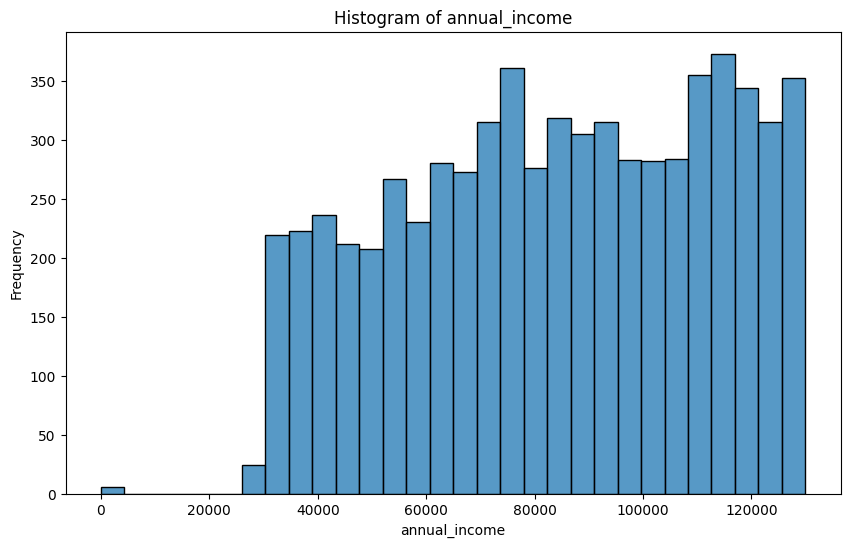

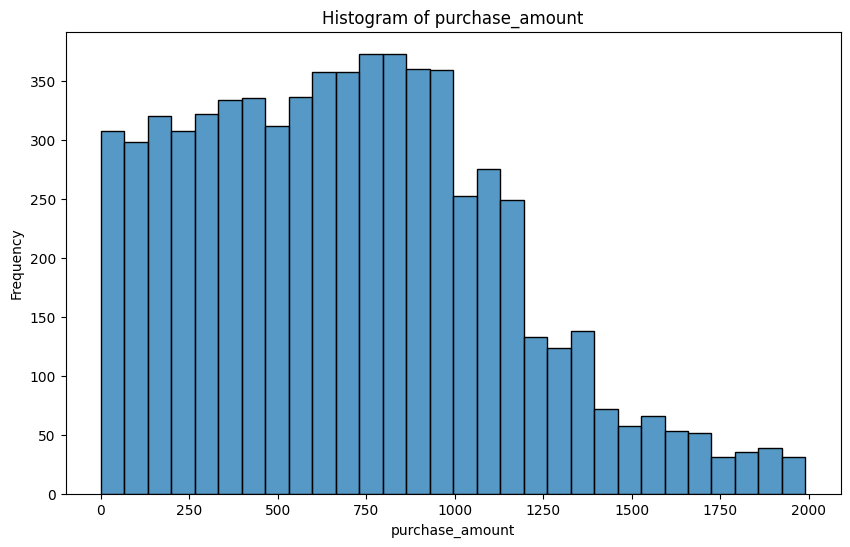

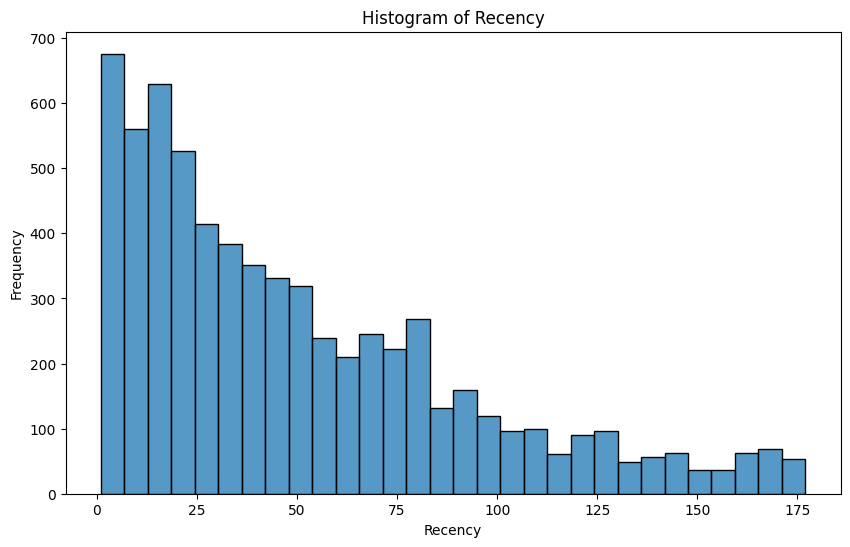

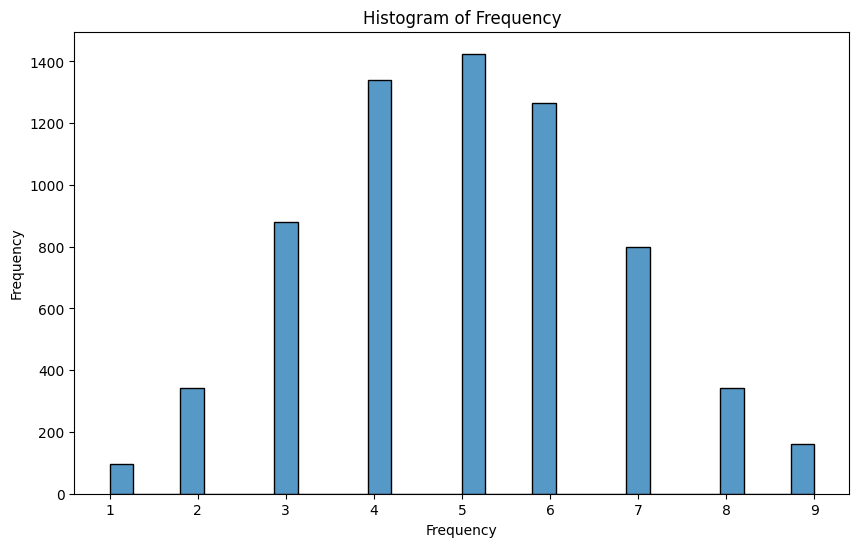

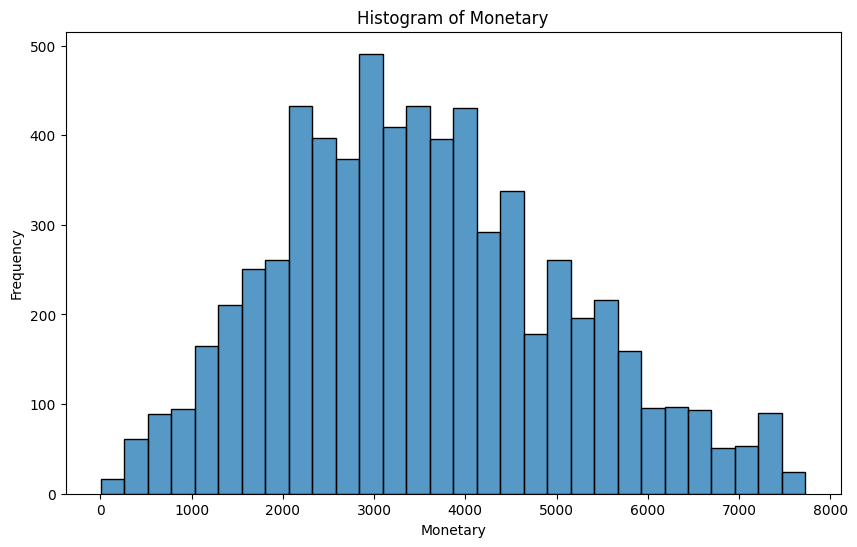

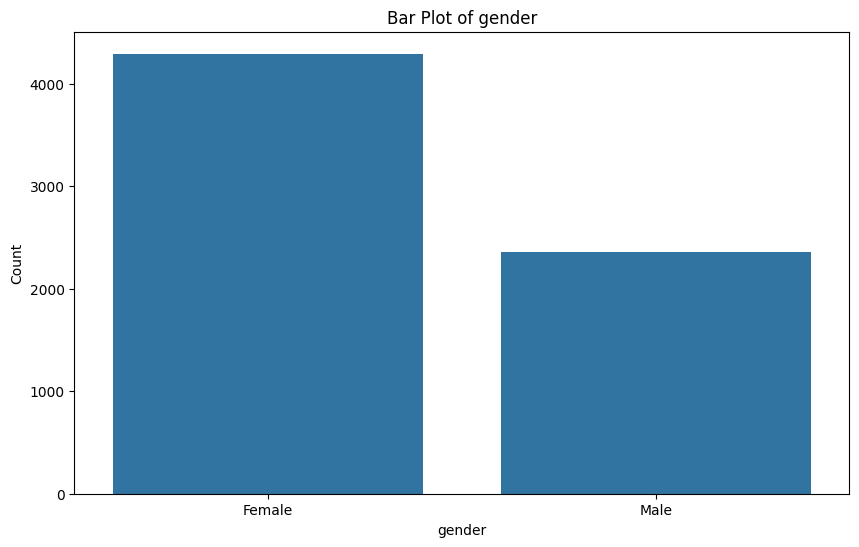

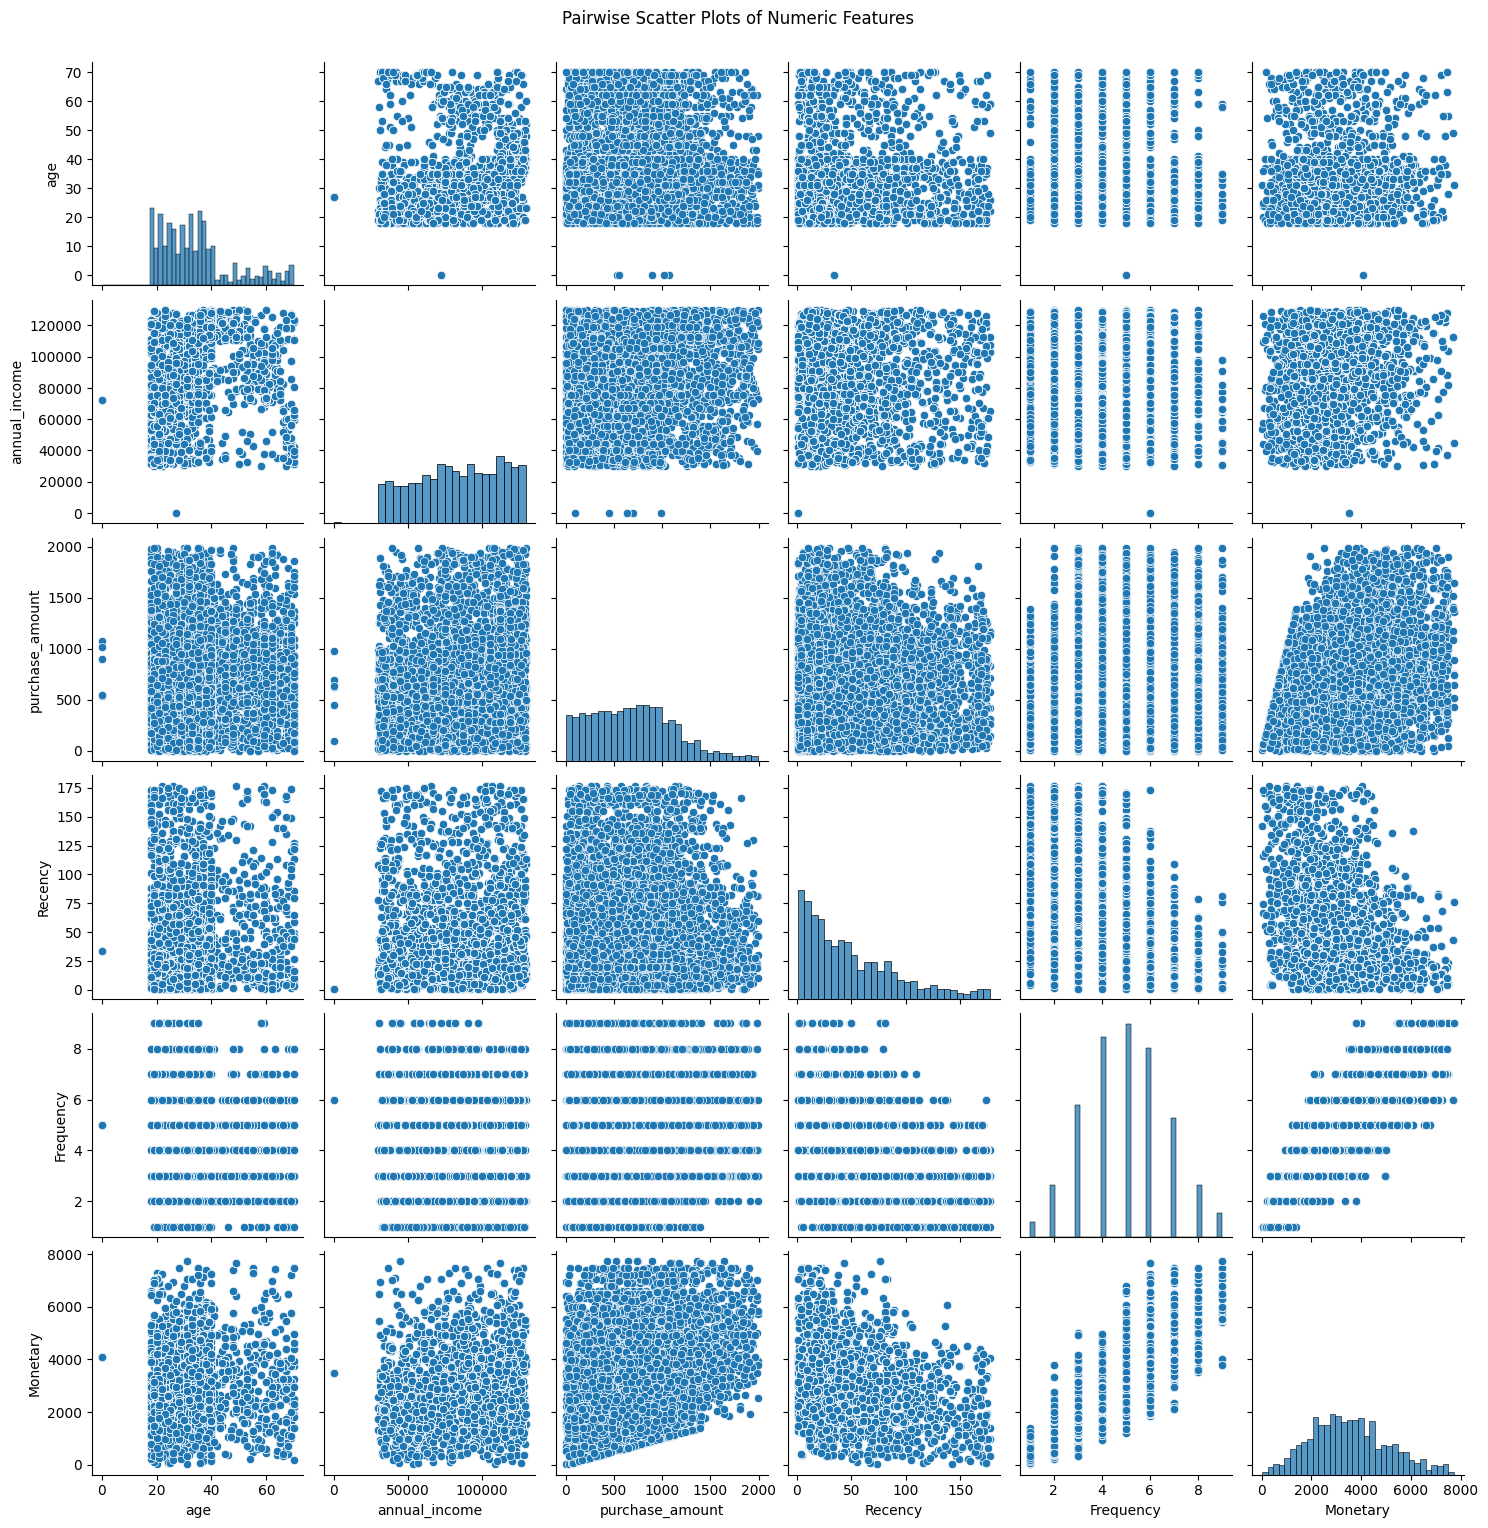

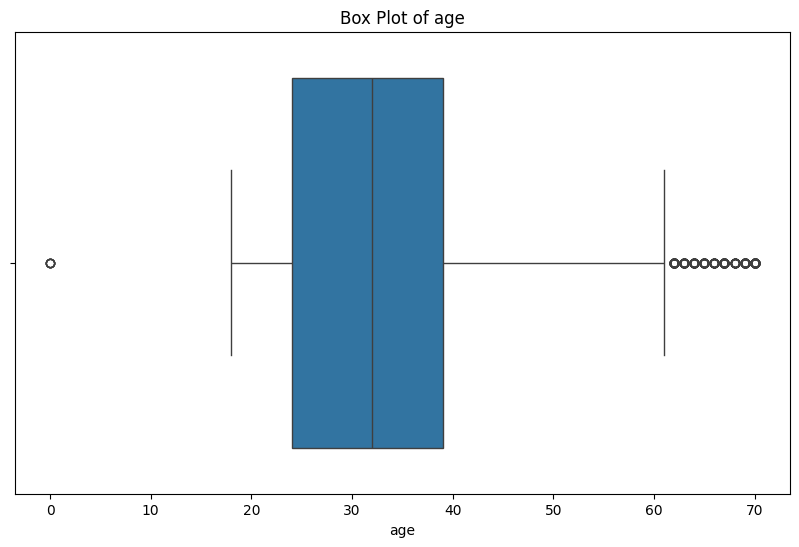

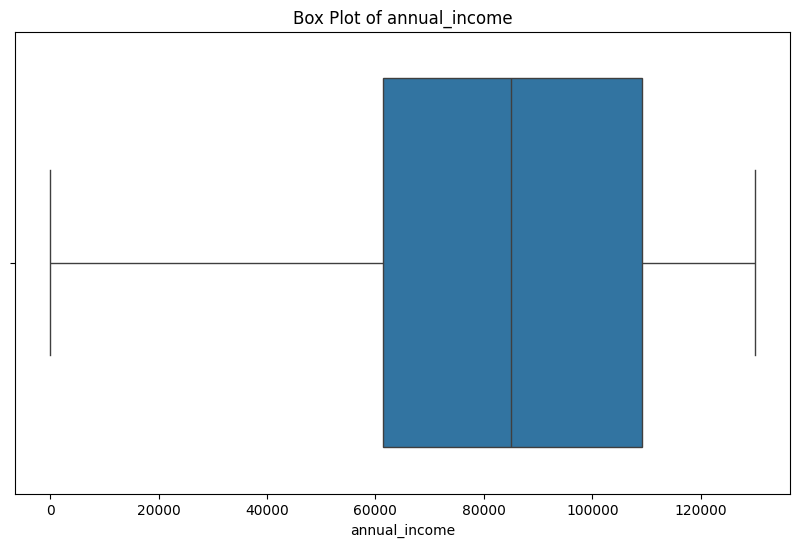

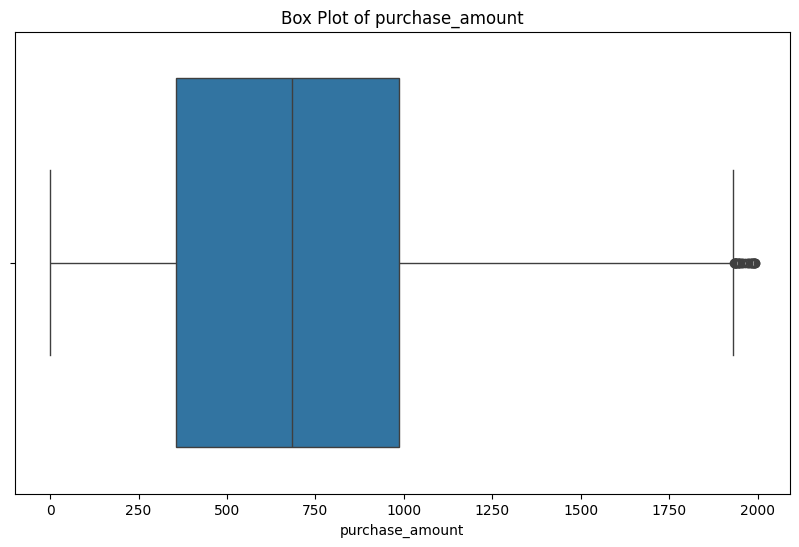

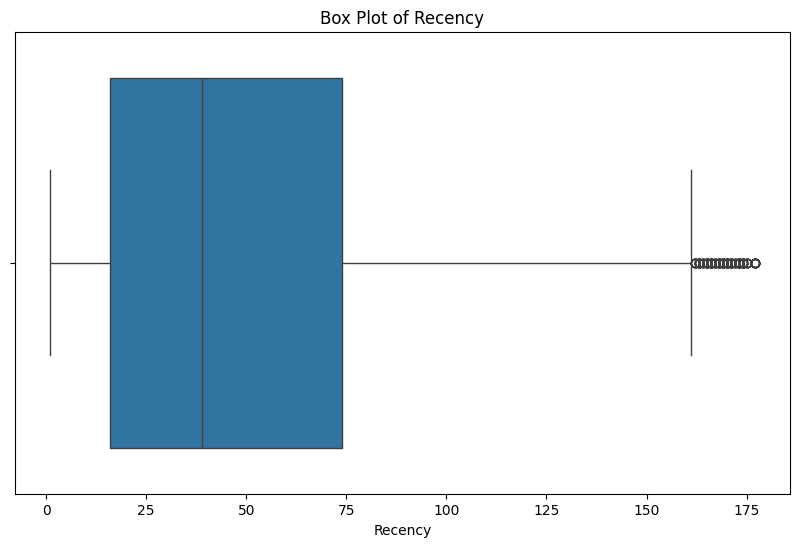

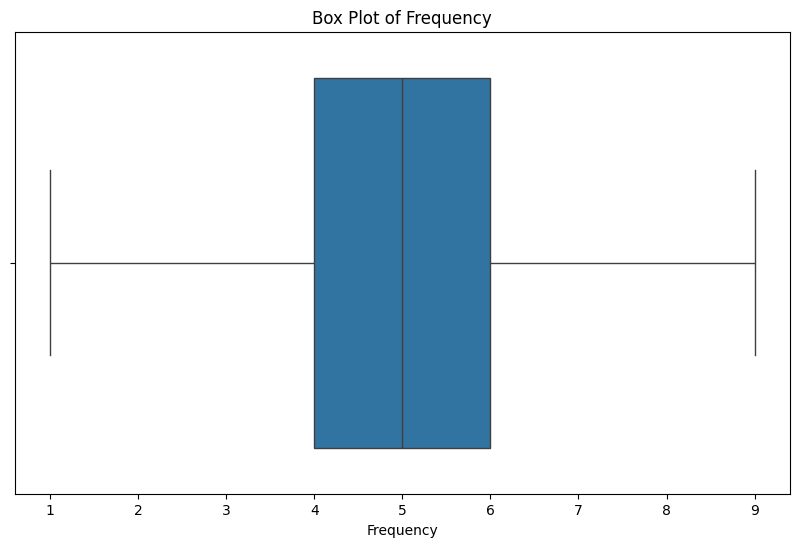

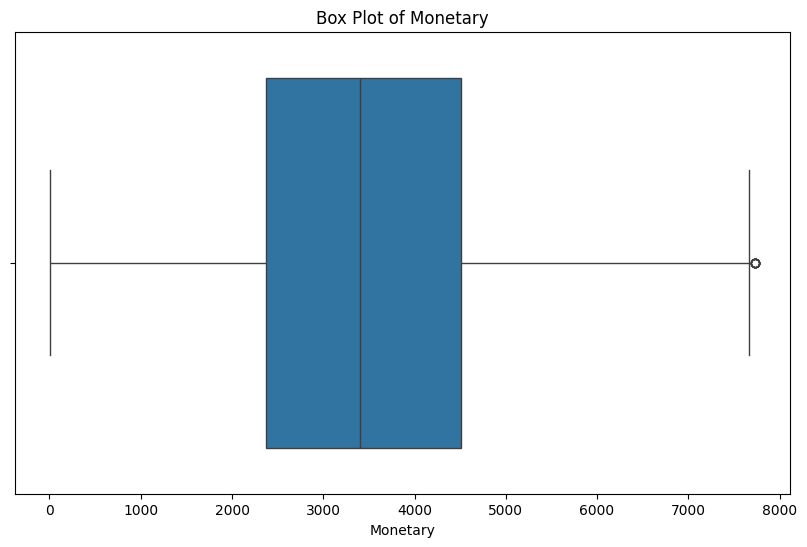

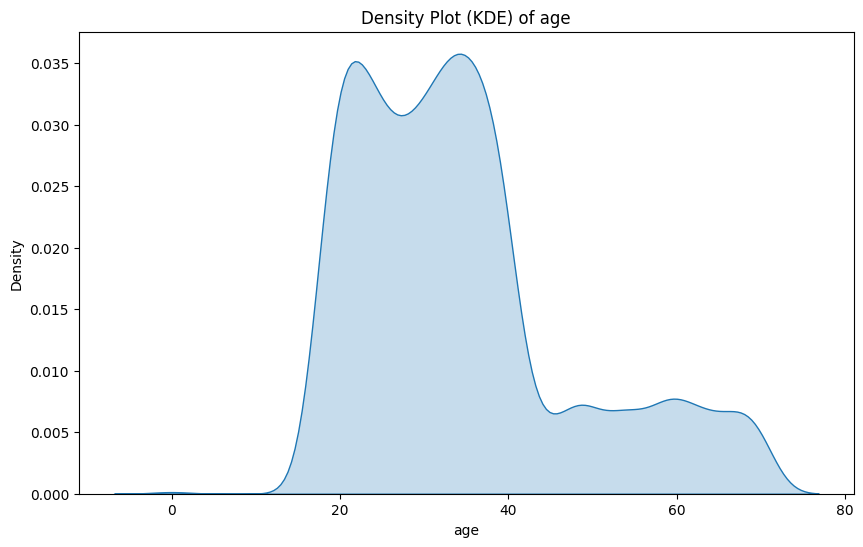

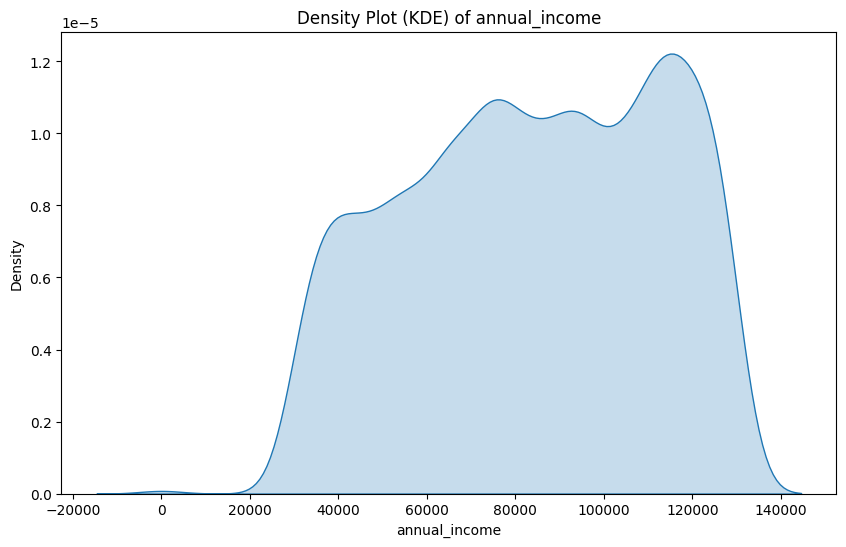

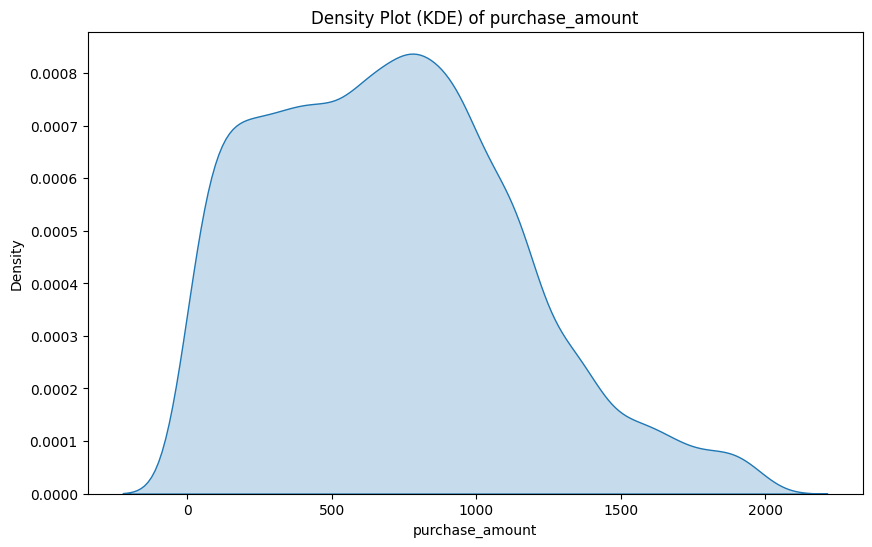

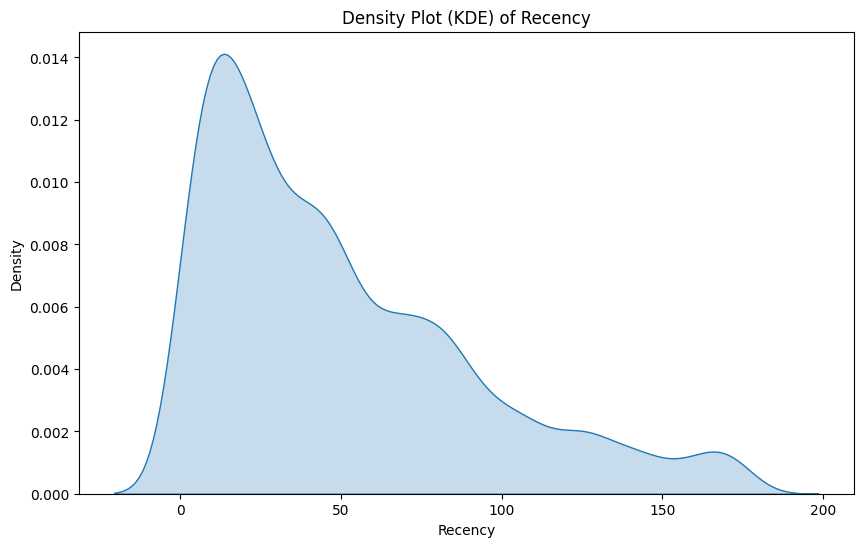

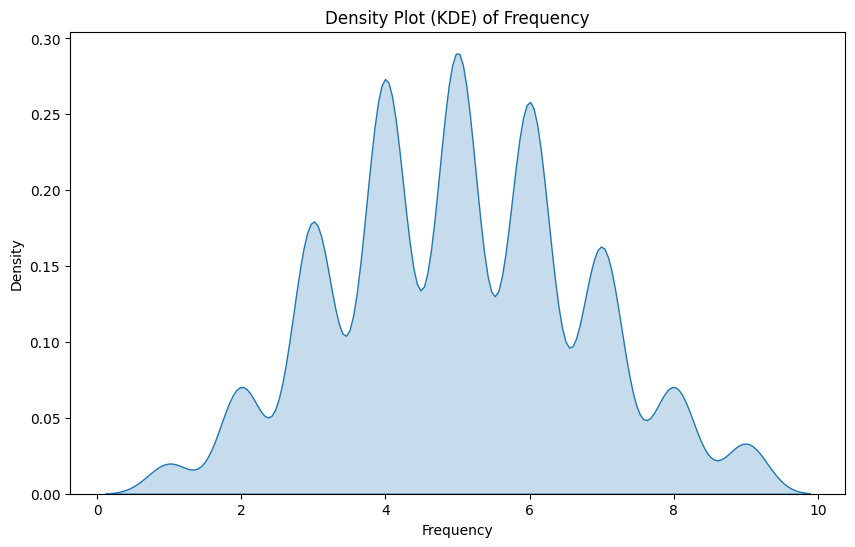

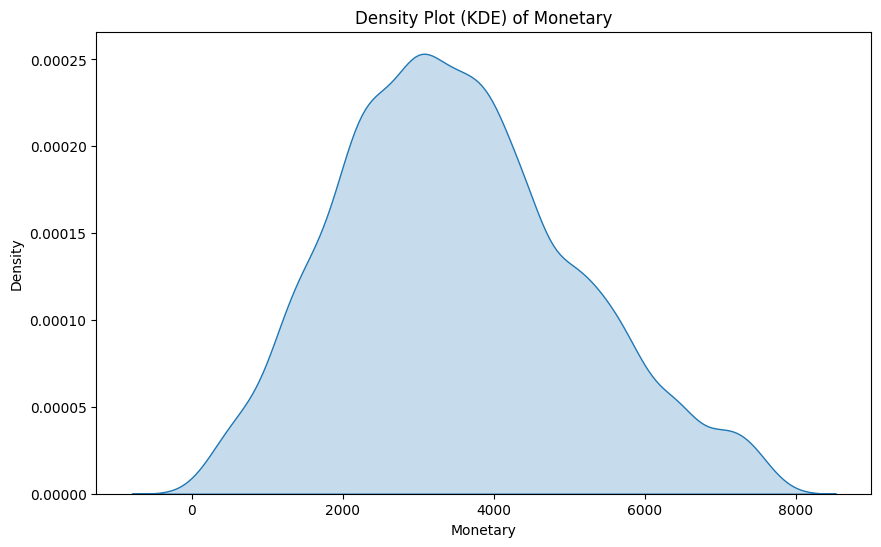

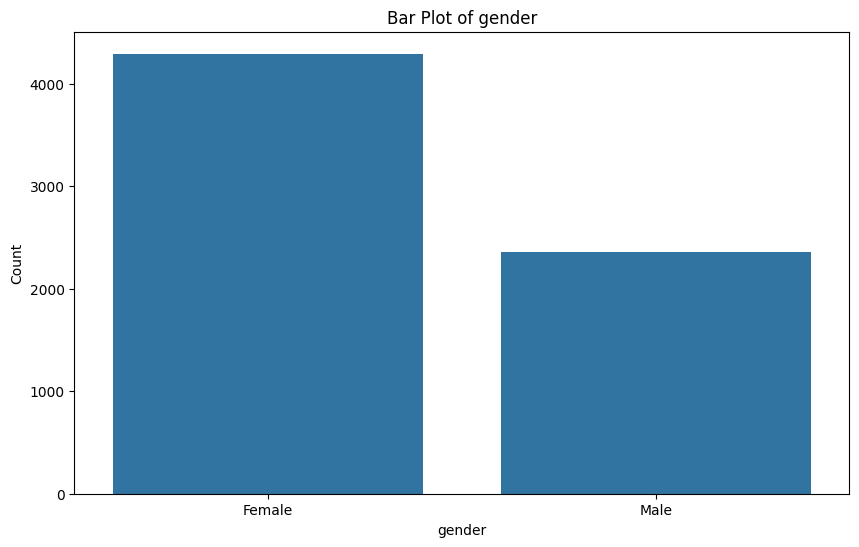

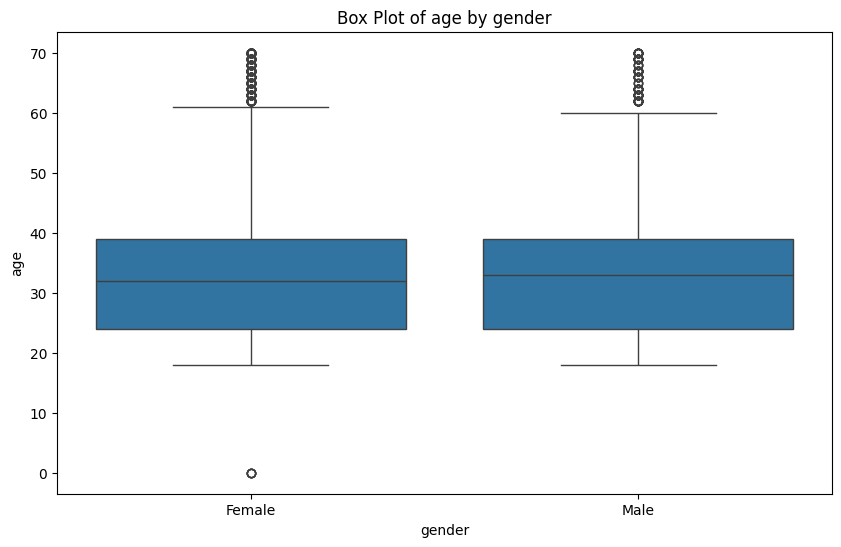

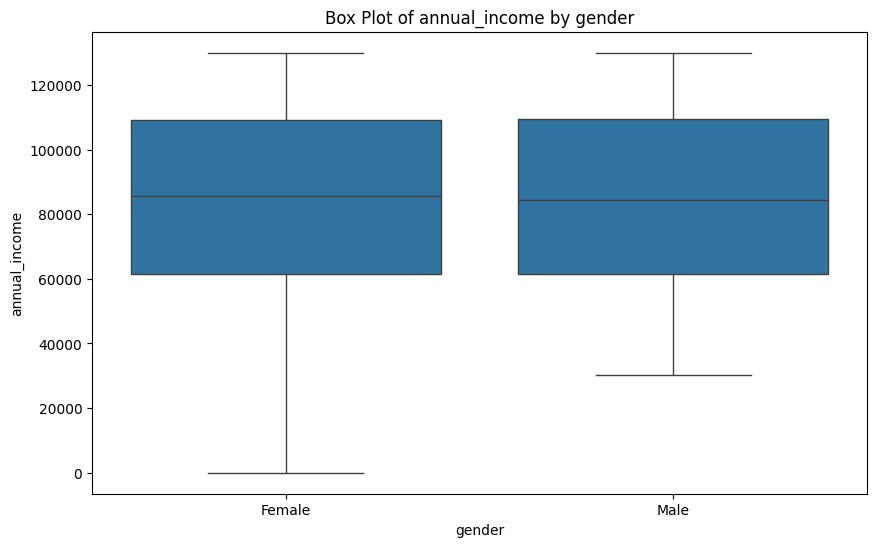

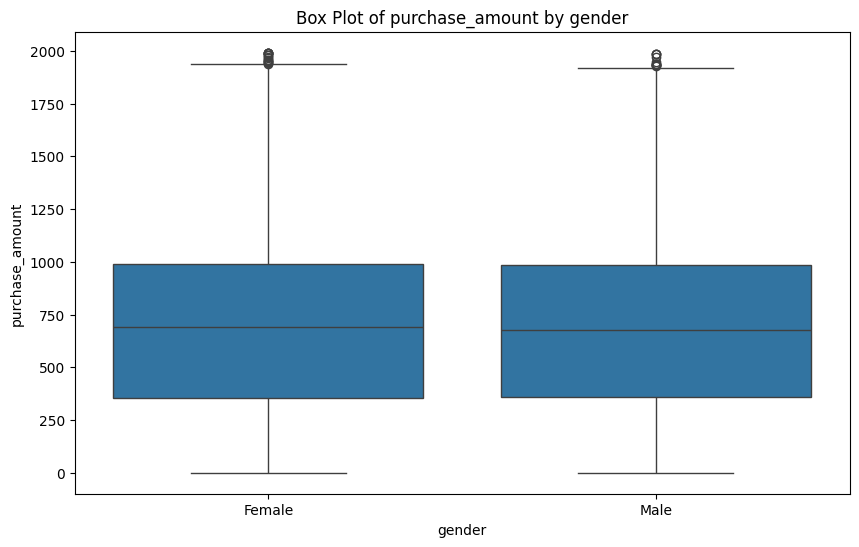

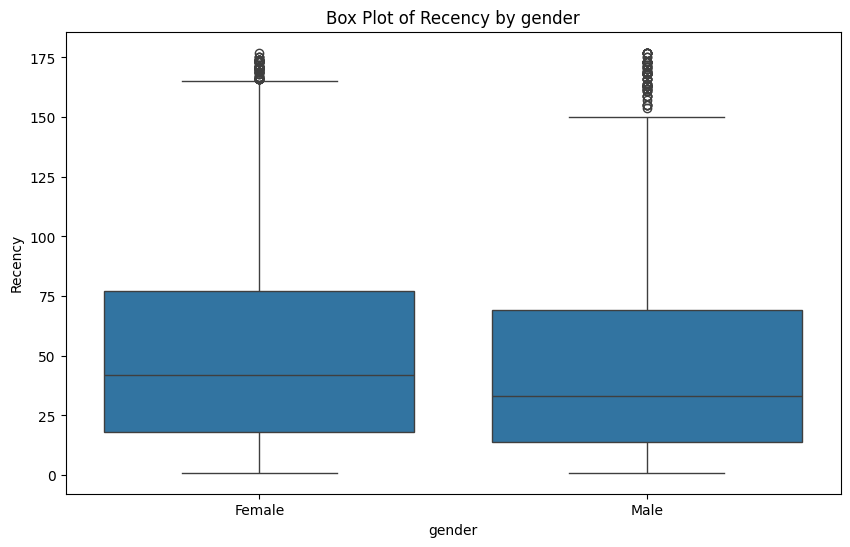

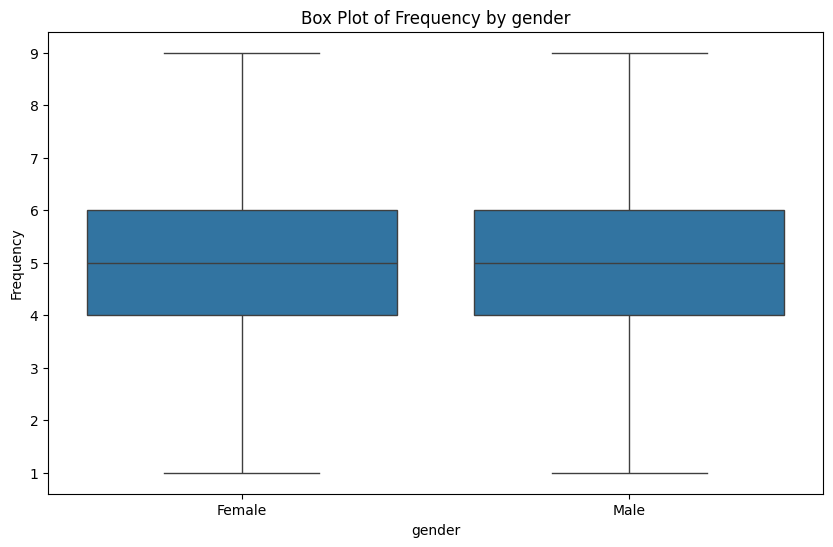

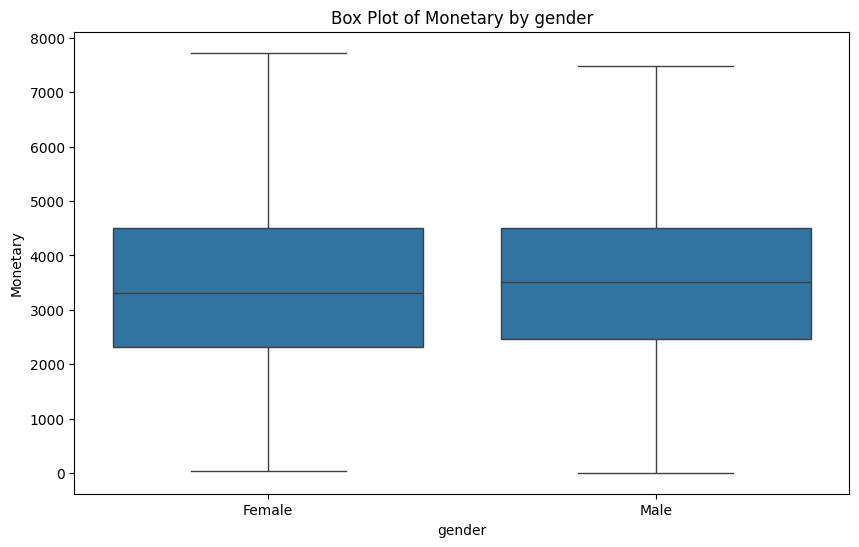

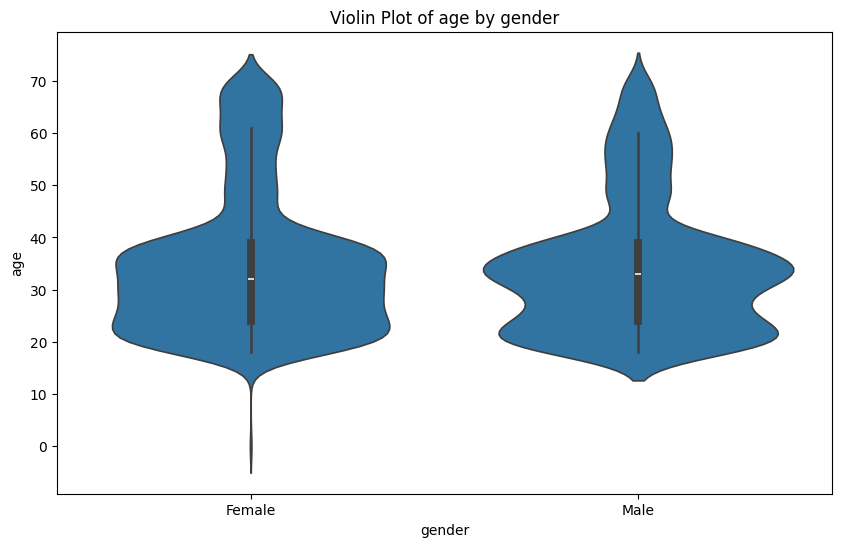

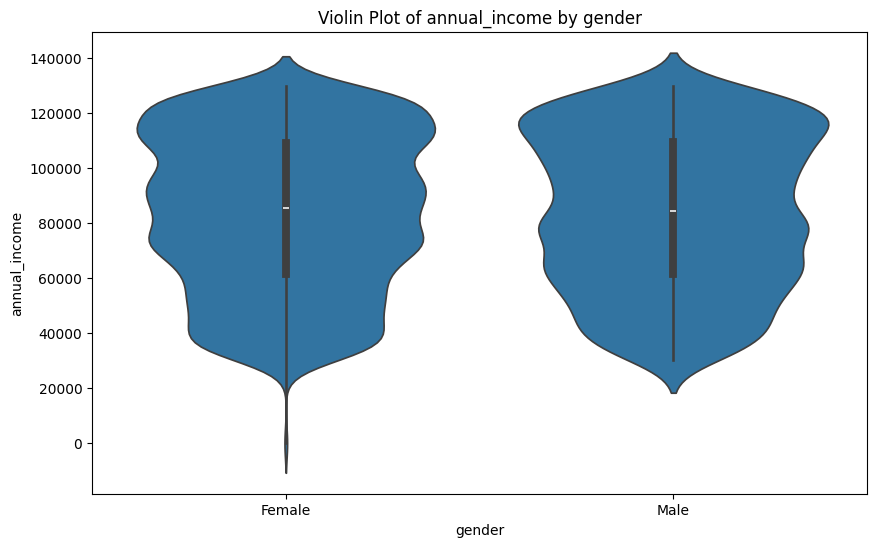

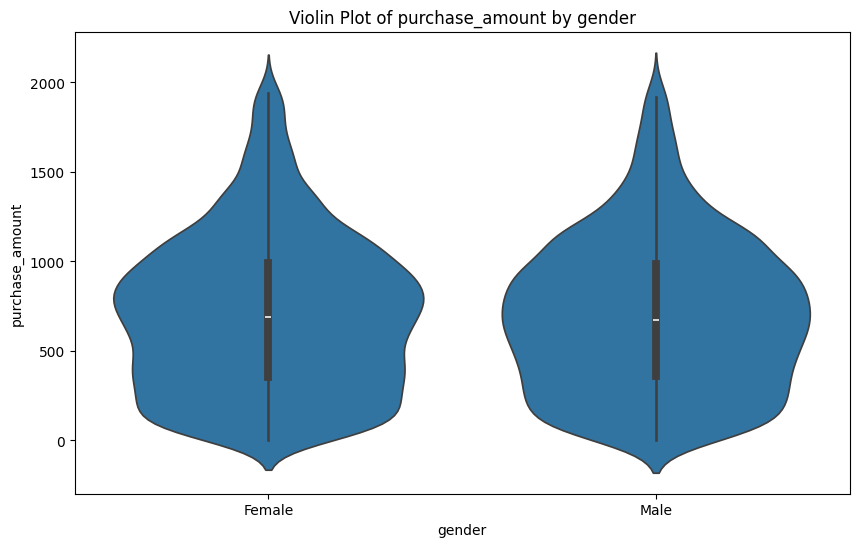

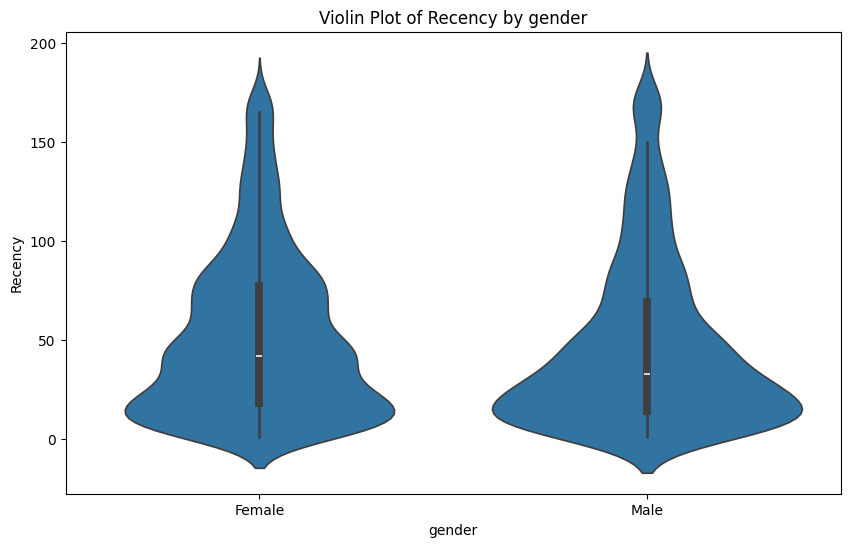

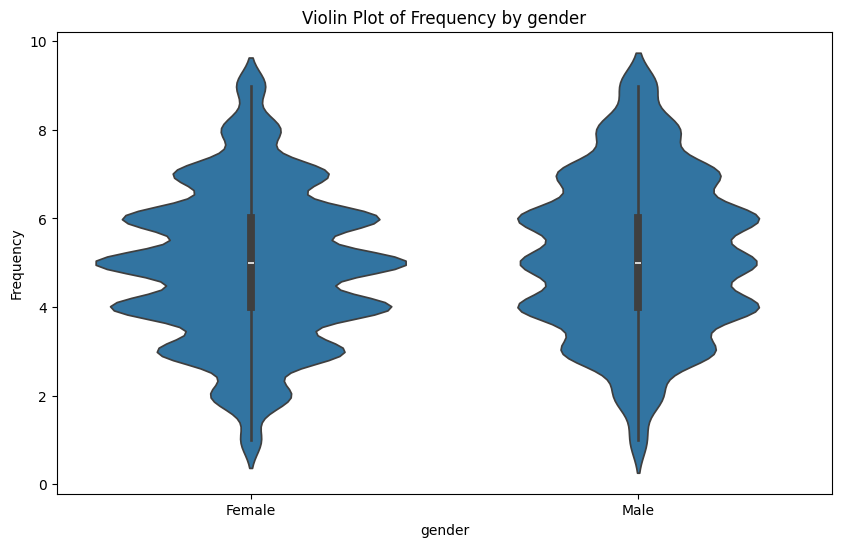

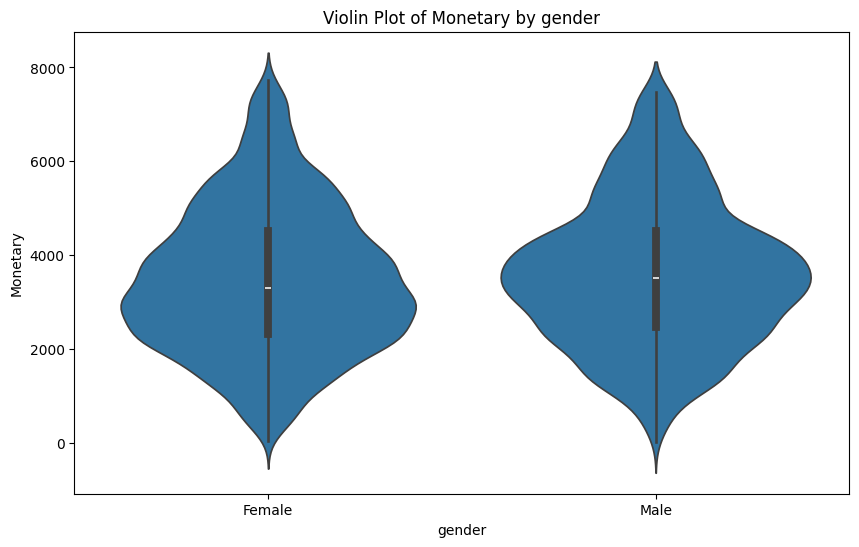

In [55]:
analyzer.Plotter.plot_all()

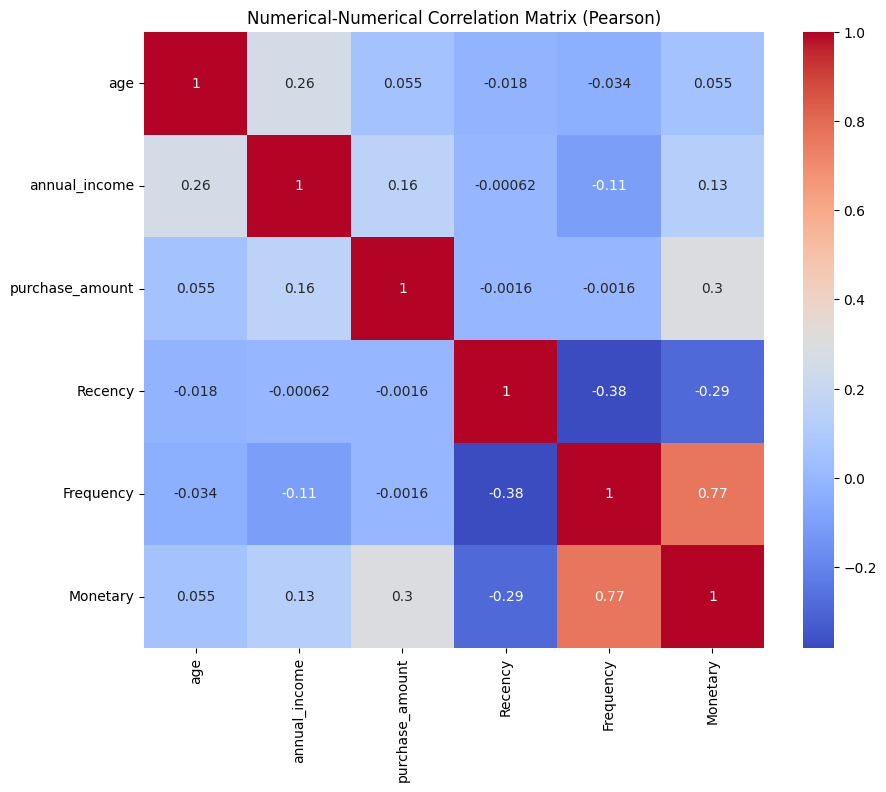

In [56]:
analyzer.Correlation.numerical_correlation_matrix(plot=True);

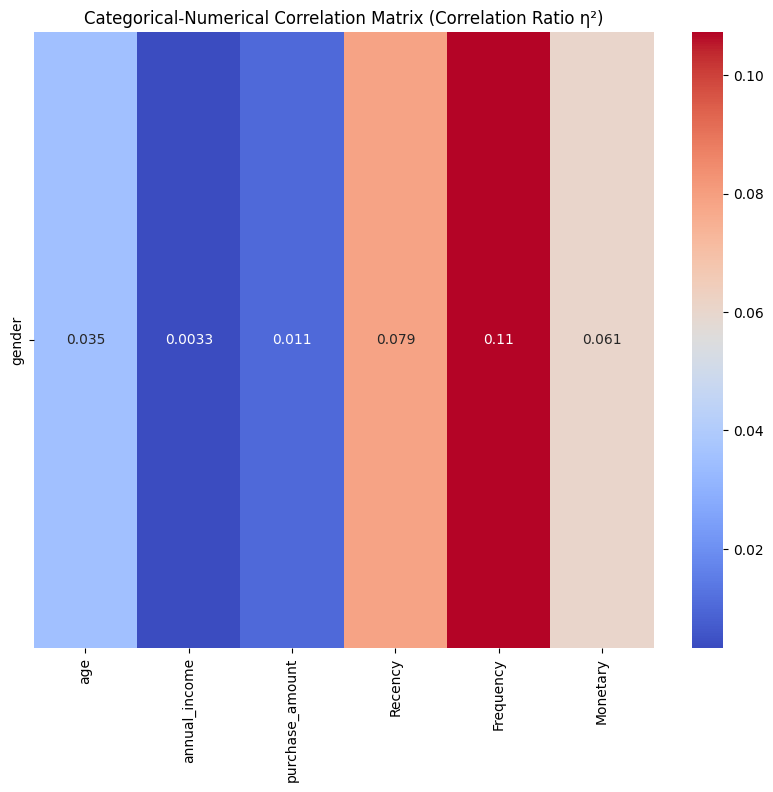

In [57]:
analyzer.Correlation.categorical_numerical_correlation_matrix(plot=True);

In [58]:
# analyzer.separate_and_save_datasets(train_filename='data/rfm_no_outlier_dropped_train_dataset.csv', test_filename='data/rfm_no_outlier__dropped_test_dataset.csv')